# RMD PST data Analysis

In [1]:
# Get the username and use that to set-up paths to data and figures
uname  = !whoami
uname = uname[0]
path2code = '/Users/' + uname + '/Work/Dillon/Expts/Code/'
path2data = '/Users/' + uname + '/Work/Dillon/Expts/REWMEM/Version4/Data/'
path2analysis = '/Users/' + uname + '/Work/Dillon/Expts/REWMEM/Version4/Analysis/RMD_PST/'
path2figs = '/Users/' + uname + '/Work/Dillon/Expts/REWMEM/Version4/Analysis/RMD_PST/Figures/'

In [2]:
%cd {path2code}

import csv, misc, os, random, re, SelfRep
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sp
from matplotlib import pyplot as plt
%matplotlib inline
%load_ext rpy2.ipython

%R suppressMessages(library('lmerTest'))
%R suppressMessages(library('lsmeans'))
%R lsm.options(disable.pbkrtest=TRUE)
%R suppressMessages(library('effsize'))
%R suppressMessages(library('afex'))
%R suppressMessages(library('QuantPsyc')) 
%R suppressMessages(library('vcd'))

/Users/ebarrick/Work/Dillon/Expts/Code


array(['vcd', 'grid', 'QuantPsyc', 'MASS', 'boot', 'afex', 'effsize',
       'lsmeans', 'estimability', 'lmerTest', 'lme4', 'Matrix', 'tools',
       'stats', 'graphics', 'grDevices', 'utils', 'datasets', 'methods',
       'base'],
      dtype='|S12')

In [3]:
def print_full(x):
    '''Print all rows of dataframe x'''
    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_rows', None)
    return(x)

# Self Report

In [3]:
# Assemble self-report and demographics
pd.options.mode.chained_assignment = None

demo = SelfRep.demo_proc(path2data + 'RMD_SelfReport.xlsx')
cc = SelfRep.cc_proc(path2data + 'RMD_SelfReport.xlsx')
bb = SelfRep.bb_proc(path2data + 'RMD_SelfReport.xlsx')
bdi = SelfRep.bdi_proc(path2data + 'RMD_SelfReport.xlsx')
masq = SelfRep.masq_proc(path2data + 'RMD_SelfReport.xlsx')
aes = SelfRep.aes_proc(path2data + 'RMD_SelfReport.xlsx')
stai = SelfRep.stai_proc(path2data + 'RMD_SelfReport.xlsx')
shaps = SelfRep.shaps_proc(path2data + 'RMD_SelfReport.xlsx')
psqi = SelfRep.psqi_proc(path2data + 'RMD_SelfReport.xlsx')
tci = SelfRep.tci_proc(path2data + 'RMD_SelfReport.xlsx')
neo = SelfRep.neo_proc(path2data + 'RMD_SelfReport.xlsx')
poms = SelfRep.poms_proc(path2data + 'RMD_SelfReport.xlsx')
wtar = SelfRep.wtar_proc(path2data + 'RMD_SelfReport.xlsx')

sr = pd.merge(left=demo,right=bdi,left_on='subject',right_on='subject')
sr = pd.merge(left=sr,right=cc,left_on='subject',right_on='subject')
sr = pd.merge(left=sr,right=bb,left_on='subject',right_on='subject')
sr = pd.merge(left=sr,right=masq,left_on='subject',right_on='subject')
sr = pd.merge(left=sr,right=aes,left_on='subject',right_on='subject')
sr = pd.merge(left=sr,right=stai,left_on='subject',right_on='subject')
sr = pd.merge(left=sr,right=shaps,left_on='subject',right_on='subject')
sr = pd.merge(left=sr,right=psqi,left_on='subject',right_on='subject')
sr = pd.merge(left=sr,right=tci,left_on='subject',right_on='subject')
sr = pd.merge(left=sr,right=neo,left_on='subject',right_on='subject')
sr = pd.merge(left=sr,right=poms,left_on='subject',right_on='subject')
sr = pd.merge(left=sr,right=wtar,left_on='subject',right_on='subject')

# Drop the ineligible subjects and the pilot subjects
sr = sr[~((sr.Eligible == 0) | (sr.Group == 'Pilot'))]

In [4]:
sr.tail()

,subject,Group,Age,Gender,Race,Ethnicity,Marital_Status,Education_Level,Education_Years,Occupation,...,NEO_C,POMS_TenseAnx,POMS_DepDeject,POMS_AngHost,POMS_VigorAct,POMS_FatigueInert,POMS_ConfuseBewild,POMS_TotalMoodDisturb,WTAR_NatEng,WTAR_StdScore
91,RMD102,MDD,27,F,Af,NH,Never Married,Some college,15.0,certified nursing assistant,...,48.0,16.0,20.0,16.0,0.0,16.0,2.0,70.0,yes,72.0
92,RMD103,MDD,22,M,W,NH,Never married,some college,16.0,student,...,49.0,8.0,4.0,2.0,0.0,12.0,4.0,30.0,yes,103.0
93,RMD104,HC,21,F,A,NaN,Never Married,Some College,13.0,student,...,56.0,1.0,0.0,0.0,13.0,1.0,3.0,-8.0,yes,122.0
94,RMD105,MDD,29,F,A,NH,Never Married,Graduate or Professional School,22.0,Post doc,...,39.0,15.0,20.0,19.0,10.0,19.0,15.0,78.0,no,109.0
95,RMD106,HC,19,F,W,NH,Never Married,high school,12.0,NaN,...,45.0,5.0,0.0,1.0,8.0,2.0,4.0,4.0,yes,110.0


In [5]:
# How many eligible subjects per group?
sr.groupby('Group')['subject'].nunique()

Group
HC     43
MDD    43
Name: subject, dtype: int64

### *Demographics*

Group
HC     29.395349
MDD    29.720930
Name: Age, dtype: float64
Group
HC      8.720910
MDD    11.770272
Name: Age, dtype: float64
t(84) = -0.15, p = 0.884, g = -0.031


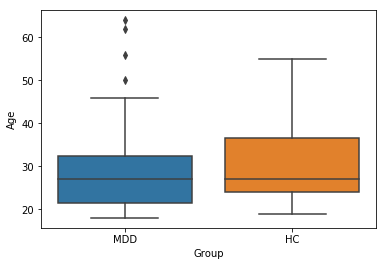

In [6]:
print sr.groupby('Group')['Age'].mean()
print sr.groupby('Group')['Age'].std()

misc.ttest_2s(sr[sr.Group == 'HC']['Age'],sr[sr.Group == 'MDD']['Age'])
sns.boxplot(y='Age', x='Group', data = sr)

Group
HC     16.546512
MDD    16.058140
Name: Education_Years, dtype: float64
Group
HC     2.367473
MDD    2.866492
Name: Education_Years, dtype: float64
t(84) = 0.86, p = 0.391, g = 0.186


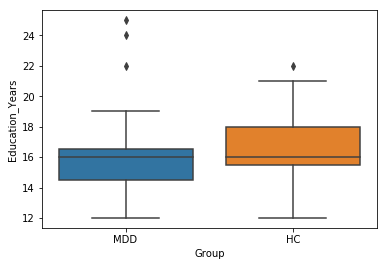

In [7]:
print sr.groupby('Group')['Education_Years'].mean()
print sr.groupby('Group')['Education_Years'].std()

misc.ttest_2s(sr[sr.Group == 'HC']['Education_Years'],sr[sr.Group == 'MDD']['Education_Years'])
sns.boxplot(y='Education_Years', x='Group', data = sr)

### *BDI*

Group
HC      1.418605
MDD    28.558140
Name: BDI_total, dtype: float64
Group
HC     2.382801
MDD    8.039493
Name: BDI_total, dtype: float64
t(84) = -21.22, p = 0.000, g = -4.577


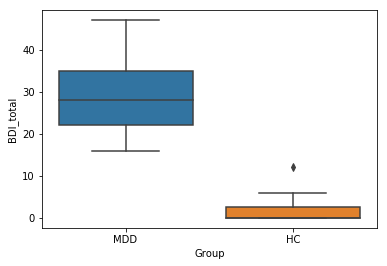

In [8]:
print sr.groupby('Group')['BDI_total'].mean()
print sr.groupby('Group')['BDI_total'].std()

misc.ttest_2s(sr[sr.Group == 'HC']['BDI_total'],sr[sr.Group == 'MDD']['BDI_total'])

sns.boxplot(y='BDI_total', x='Group', data = sr)

### *BIS-BAS*

Between-group t-test on BIS
t(84) = -6.24, p = 0.000, g = -1.346
Between-group t-test on BAS_D
t(84) = 2.50, p = 0.014, g = 0.539
Between-group t-test on BAS_FS
t(84) = 4.16, p = 0.000, g = 0.897
Between-group t-test on BAS_RR
t(84) = 1.03, p = 0.304, g = 0.223


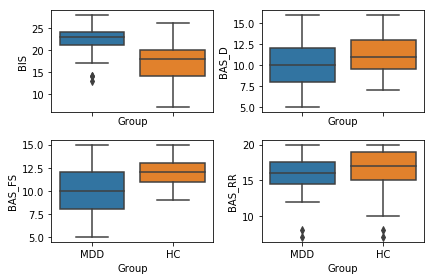

In [9]:
print 'Between-group t-test on BIS'
misc.ttest_2s(sr[sr.Group == 'HC']['BIS'],sr[sr.Group == 'MDD']['BIS'])
print 'Between-group t-test on BAS_D'
misc.ttest_2s(sr[sr.Group == 'HC']['BAS_D'],sr[sr.Group == 'MDD']['BAS_D'])
print 'Between-group t-test on BAS_FS'
misc.ttest_2s(sr[sr.Group == 'HC']['BAS_FS'],sr[sr.Group == 'MDD']['BAS_FS'])
print 'Between-group t-test on BAS_RR'
misc.ttest_2s(sr[sr.Group == 'HC']['BAS_RR'],sr[sr.Group == 'MDD']['BAS_RR'])


# fig = plt.figure()
# bis = fig.add_subplot(141)
# sns.boxplot(y='BIS', x='Group', data = sr)
# bis = fig.add_subplot(142)
# sns.boxplot(y='BAS_D', x='Group', data = sr)
# bas_fs = fig.add_subplot(143)
# sns.boxplot(y='BAS_FS', x='Group', data = sr)
# bas_rr = fig.add_subplot(144)
# sns.boxplot(y='BAS_RR', x='Group', data = sr)
# fig.tight_layout()

# A different look, just for fun . . . 
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,sharex=True,sharey=False)
sns.boxplot(y='BIS',x='Group',data=sr,ax=ax1)
sns.boxplot(y='BAS_D',x='Group',data=sr,ax=ax2)
sns.boxplot(y='BAS_FS',x='Group',data=sr,ax=ax3)
sns.boxplot(y='BAS_RR',x='Group',data=sr,ax=ax4)
fig.tight_layout()

### *MASQ*

Between-group t-tests on MASQ_AD
t(84) = -19.28, p = 0.000, g = -4.157
Between-group t-tests on MASQ_GDD
t(84) = -16.34, p = 0.000, g = -3.523
Between-group t-tests on MASQ_AA
t(84) = -5.33, p = 0.000, g = -1.149
Between-group t-tests on MASQ_GDA
t(84) = -9.74, p = 0.000, g = -2.101


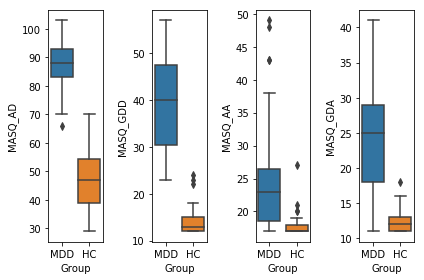

In [10]:
print 'Between-group t-tests on MASQ_AD'
misc.ttest_2s(sr[sr.Group == 'HC']['MASQ_AD'],sr[sr.Group == 'MDD']['MASQ_AD'])
print 'Between-group t-tests on MASQ_GDD'
misc.ttest_2s(sr[sr.Group == 'HC']['MASQ_GDD'],sr[sr.Group == 'MDD']['MASQ_GDD'])
print 'Between-group t-tests on MASQ_AA'
misc.ttest_2s(sr[sr.Group == 'HC']['MASQ_AA'],sr[sr.Group == 'MDD']['MASQ_AA'])
print 'Between-group t-tests on MASQ_GDA'
misc.ttest_2s(sr[sr.Group == 'HC']['MASQ_GDA'],sr[sr.Group == 'MDD']['MASQ_GDA'])

fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4,sharex=True,sharey=False)
sns.boxplot(y='MASQ_AD', x='Group', data=sr, ax=ax1)
sns.boxplot(y='MASQ_GDD', x='Group', data=sr, ax=ax2)
sns.boxplot(y='MASQ_AA', x='Group', data=sr, ax=ax3)
sns.boxplot(y='MASQ_GDA', x='Group', data=sr, ax=ax4)
fig.tight_layout()

### *AES*

Group
HC     23.930233
MDD    43.976744
Name: AES_total, dtype: float64
Group
HC     5.016142
MDD    6.508194
Name: AES_total, dtype: float64
t(84) = -16.00, p = 0.000, g = -3.450


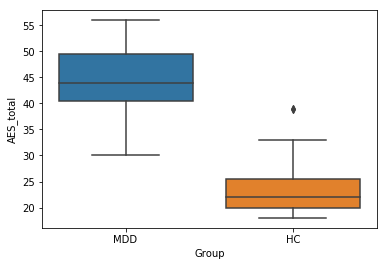

In [11]:
print sr.groupby('Group')['AES_total'].mean()
print sr.groupby('Group')['AES_total'].std()

misc.ttest_2s(sr[sr.Group == 'HC']['AES_total'],sr[sr.Group == 'MDD']['AES_total'])

sns.boxplot(y='AES_total', x='Group', data = sr)

### *STAI*

Descriptive data: STAI Trait . . .
Group
HC     24.976744
MDD    44.558140
Name: STAI_Trait, dtype: float64
Group
HC      4.733308
MDD    10.097860
Name: STAI_Trait, dtype: float64
t(84) = -11.51, p = 0.000, g = -2.483

Descriptive data: STAI State . . .
Group
HC     28.209302
MDD    58.720930
Name: STAI_State, dtype: float64
Group
HC     6.773752
MDD    8.075022
Name: STAI_State, dtype: float64
t(84) = -18.98, p = 0.000, g = -4.094


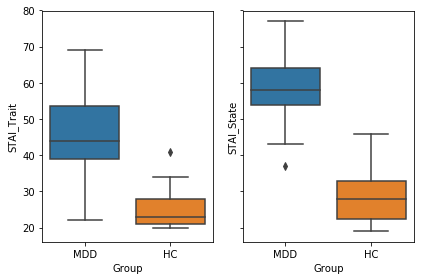

In [12]:
print 'Descriptive data: STAI Trait . . .'
print sr.groupby('Group')['STAI_Trait'].mean()
print sr.groupby('Group')['STAI_Trait'].std()
misc.ttest_2s(sr[sr.Group == 'HC']['STAI_Trait'],sr[sr.Group == 'MDD']['STAI_Trait'])

print '\nDescriptive data: STAI State . . .'
print sr.groupby('Group')['STAI_State'].mean()
print sr.groupby('Group')['STAI_State'].std()
misc.ttest_2s(sr[sr.Group == 'HC']['STAI_State'],sr[sr.Group == 'MDD']['STAI_State'])

fig, (ax1, ax2) = plt.subplots(1,2,sharex=True, sharey=True)
sns.boxplot(y='STAI_Trait', x='Group', data=sr, ax=ax1)
sns.boxplot(y='STAI_State', x='Group', data=sr, ax=ax2)
fig.tight_layout()

### *SHAPS*

Group
HC     0.348837
MDD    5.511628
Name: SHAPS, dtype: float64
Group
HC     0.719911
MDD    3.397282
Name: SHAPS, dtype: float64
t(84) = -9.75, p = 0.000, g = -2.102


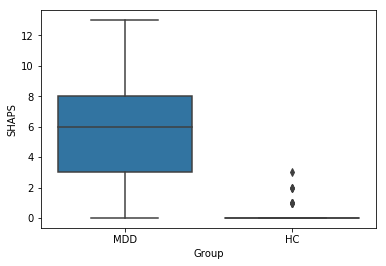

In [13]:
print sr.groupby('Group')['SHAPS'].mean()
print sr.groupby('Group')['SHAPS'].std()

misc.ttest_2s(sr[sr.Group == 'HC']['SHAPS'],sr[sr.Group == 'MDD']['SHAPS'])
sns.boxplot(y='SHAPS', x='Group', data = sr)

### *PSQI*

PSQI duration
t(84) = -2.17, p = 0.033, g = -0.467
PSQI Distubance
t(84) = -2.32, p = 0.023, g = -0.501
PSQI Latency
t(84) = -2.86, p = 0.005, g = -0.621
PSQI Daytime Disturbance
t(84) = -14.12, p = 0.000, g = -3.046
PSQI Efficiency
t(84) = -2.04, p = 0.044, g = -0.441
PSQI Quality
t(84) = -4.29, p = 0.000, g = -0.930
PSQI Medication
t(84) = -0.36, p = 0.720, g = -0.078
PSQI Total
t(84) = -6.75, p = 0.000, g = -1.471


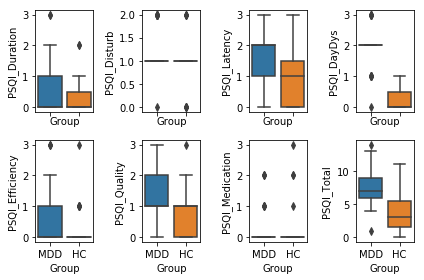

In [14]:
print 'PSQI duration'
misc.ttest_2s(sr[sr.Group == 'HC']['PSQI_Duration'],sr[sr.Group == 'MDD']['PSQI_Duration'])
print 'PSQI Distubance'
misc.ttest_2s(sr[sr.Group == 'HC']['PSQI_Disturb'],sr[sr.Group == 'MDD']['PSQI_Disturb'])
print 'PSQI Latency'
misc.ttest_2s(sr[sr.Group == 'HC']['PSQI_Latency'],sr[sr.Group == 'MDD']['PSQI_Latency'])
print 'PSQI Daytime Disturbance'
misc.ttest_2s(sr[sr.Group == 'HC']['PSQI_DayDys'],sr[sr.Group == 'MDD']['PSQI_DayDys'])
print 'PSQI Efficiency'
misc.ttest_2s(sr[sr.Group == 'HC']['PSQI_Efficiency'],sr[sr.Group == 'MDD']['PSQI_Efficiency'])
print 'PSQI Quality'
misc.ttest_2s(sr[sr.Group == 'HC']['PSQI_Quality'],sr[sr.Group == 'MDD']['PSQI_Quality'])
print 'PSQI Medication'
misc.ttest_2s(sr[sr.Group == 'HC']['PSQI_Medication'],sr[sr.Group == 'MDD']['PSQI_Medication'])
print 'PSQI Total'
misc.ttest_2s(sr[sr.Group == 'HC']['PSQI_Total'],sr[sr.Group == 'MDD']['PSQI_Total'])

fig, ((ax1, ax2, ax3, ax4),(ax5, ax6, ax7, ax8)) = plt.subplots(2,4,sharex=True,sharey=False)
sns.boxplot(y='PSQI_Duration', x='Group', data=sr,ax=ax1)
sns.boxplot(y='PSQI_Disturb', x='Group', data=sr,ax=ax2)
sns.boxplot(y='PSQI_Latency', x='Group', data=sr,ax=ax3)
sns.boxplot(y='PSQI_DayDys', x='Group', data=sr,ax=ax4)

sns.boxplot(y='PSQI_Efficiency', x='Group', data=sr,ax=ax5)
sns.boxplot(y='PSQI_Quality', x='Group', data=sr,ax=ax6)
sns.boxplot(y='PSQI_Medication', x='Group', data=sr,ax=ax7)
sns.boxplot(y='PSQI_Total', x='Group', data=sr,ax=ax8)

fig.tight_layout()

### *TCI*

Novelty Seeking
t(84) = -1.02, p = 0.310, g = -0.220
Harm Avoidance
t(84) = -9.90, p = 0.000, g = -2.135
Reward Dependence
t(84) = 2.88, p = 0.005, g = 0.621
Persistence
t(84) = 7.67, p = 0.000, g = 1.655
Self-Directedness
t(84) = 12.04, p = 0.000, g = 2.596
Cooperativeness
t(84) = 3.64, p = 0.000, g = 0.785
Self Transcendence
t(84) = 1.34, p = 0.185, g = 0.288


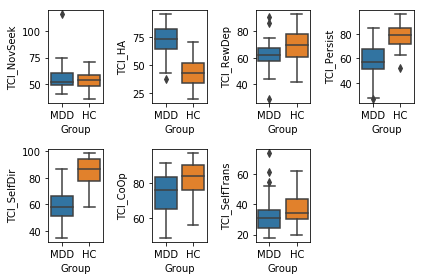

In [15]:
print 'Novelty Seeking'
misc.ttest_2s(sr[sr.Group == 'HC']['TCI_NovSeek'],sr[sr.Group == 'MDD']['TCI_NovSeek'])
print 'Harm Avoidance'
misc.ttest_2s(sr[sr.Group == 'HC']['TCI_HA'],sr[sr.Group == 'MDD']['TCI_HA'])
print 'Reward Dependence'
misc.ttest_2s(sr[sr.Group == 'HC']['TCI_RewDep'],sr[sr.Group == 'MDD']['TCI_RewDep'])
print 'Persistence'
misc.ttest_2s(sr[sr.Group == 'HC']['TCI_Persist'],sr[sr.Group == 'MDD']['TCI_Persist'])
print 'Self-Directedness'
misc.ttest_2s(sr[sr.Group == 'HC']['TCI_SelfDir'],sr[sr.Group == 'MDD']['TCI_SelfDir'])
print 'Cooperativeness'
misc.ttest_2s(sr[sr.Group == 'HC']['TCI_CoOp'],sr[sr.Group == 'MDD']['TCI_CoOp'])
print 'Self Transcendence'
misc.ttest_2s(sr[sr.Group == 'HC']['TCI_SelfTrans'],sr[sr.Group == 'MDD']['TCI_SelfTrans'])

fig = plt.figure()
nov = fig.add_subplot(241)
sns.boxplot(y='TCI_NovSeek', x='Group', data = sr)
ha = fig.add_subplot(242)
sns.boxplot(y='TCI_HA', x='Group', data = sr)
rewd = fig.add_subplot(243)
sns.boxplot(y='TCI_RewDep', x='Group', data = sr)
per = fig.add_subplot(244)
sns.boxplot(y='TCI_Persist', x='Group', data = sr)
self = fig.add_subplot(245)
sns.boxplot(y='TCI_SelfDir', x='Group', data = sr)
coop = fig.add_subplot(246)
sns.boxplot(y='TCI_CoOp', x='Group', data = sr)
med = fig.add_subplot(247)
sns.boxplot(y='TCI_SelfTrans', x='Group', data = sr) 
fig.tight_layout()

### *NEO*

Neuroticism
t(84) = -16.21, p = 0.000, g = -3.495
Extraversion
t(84) = 10.66, p = 0.000, g = 2.298
Openness to Experience
t(84) = 1.23, p = 0.221, g = 0.266
Agreeableness
t(84) = 2.82, p = 0.006, g = 0.609
Conscientiousness
t(84) = 7.95, p = 0.000, g = 1.714


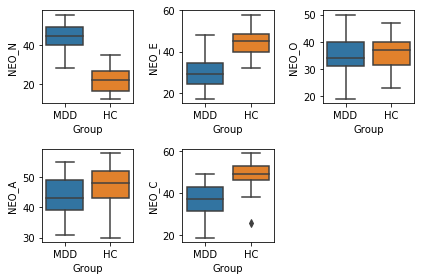

In [16]:
print 'Neuroticism'
misc.ttest_2s(sr[sr.Group == 'HC']['NEO_N'],sr[sr.Group == 'MDD']['NEO_N'])
print 'Extraversion'
misc.ttest_2s(sr[sr.Group == 'HC']['NEO_E'],sr[sr.Group == 'MDD']['NEO_E'])
print 'Openness to Experience'
misc.ttest_2s(sr[sr.Group == 'HC']['NEO_O'],sr[sr.Group == 'MDD']['NEO_O'])
print 'Agreeableness'
misc.ttest_2s(sr[sr.Group == 'HC']['NEO_A'],sr[sr.Group == 'MDD']['NEO_A'])
print 'Conscientiousness'
misc.ttest_2s(sr[sr.Group == 'HC']['NEO_C'],sr[sr.Group == 'MDD']['NEO_C'])

fig = plt.figure()
neur = fig.add_subplot(231)
sns.boxplot(y='NEO_N', x='Group', data = sr)
ext = fig.add_subplot(232)
sns.boxplot(y='NEO_E', x='Group', data = sr)
ope = fig.add_subplot(233)
sns.boxplot(y='NEO_O', x='Group', data = sr)
agr = fig.add_subplot(234)
sns.boxplot(y='NEO_A', x='Group', data = sr)
con = fig.add_subplot(235)
sns.boxplot(y='NEO_C', x='Group', data = sr)
fig.tight_layout()

### *POMS*

Tension-Anxiety
t(84) = -10.82, p = 0.000, g = -2.333
Depression
t(84) = -15.57, p = 0.000, g = -3.358
Anger-Hostility
t(84) = -6.41, p = 0.000, g = -1.381
Vigor-Activity
t(84) = 13.13, p = 0.000, g = 2.832
Fatigue
t(84) = -15.80, p = 0.000, g = -3.407
Confusion-Bewilderment
t(84) = -3.67, p = 0.000, g = -0.792
Total Mood Disturbance
t(84) = -16.85, p = 0.000, g = -3.633


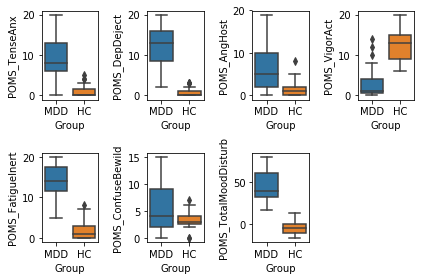

In [17]:
print 'Tension-Anxiety'
misc.ttest_2s(sr[sr.Group == 'HC']['POMS_TenseAnx'],sr[sr.Group == 'MDD']['POMS_TenseAnx'])

print 'Depression'
misc.ttest_2s(sr[sr.Group == 'HC']['POMS_DepDeject'],sr[sr.Group == 'MDD']['POMS_DepDeject'])

print 'Anger-Hostility'
misc.ttest_2s(sr[sr.Group == 'HC']['POMS_AngHost'],sr[sr.Group == 'MDD']['POMS_AngHost'])

print 'Vigor-Activity'
misc.ttest_2s(sr[sr.Group == 'HC']['POMS_VigorAct'],sr[sr.Group == 'MDD']['POMS_VigorAct'])

print 'Fatigue'
misc.ttest_2s(sr[sr.Group == 'HC']['POMS_FatigueInert'],
              sr[sr.Group == 'MDD']['POMS_FatigueInert'])

print 'Confusion-Bewilderment'
misc.ttest_2s(sr[sr.Group == 'HC']['POMS_ConfuseBewild'],
              sr[sr.Group == 'MDD']['POMS_ConfuseBewild'])

print 'Total Mood Disturbance'
misc.ttest_2s(sr[sr.Group == 'HC']['POMS_TotalMoodDisturb'],
              sr[sr.Group == 'MDD']['POMS_TotalMoodDisturb'])

fig = plt.figure()
tax = fig.add_subplot(241)
sns.boxplot(y='POMS_TenseAnx', x='Group', data = sr)
dep = fig.add_subplot(242)
sns.boxplot(y='POMS_DepDeject', x='Group', data = sr)
ah = fig.add_subplot(243)
sns.boxplot(y='POMS_AngHost', x='Group', data = sr)
va = fig.add_subplot(244)
sns.boxplot(y='POMS_VigorAct', x='Group', data = sr)
fat = fig.add_subplot(245)
sns.boxplot(y='POMS_FatigueInert', x='Group', data = sr)
cb = fig.add_subplot(246)
sns.boxplot(y='POMS_ConfuseBewild', x='Group', data = sr)
tot = fig.add_subplot(247)
sns.boxplot(y='POMS_TotalMoodDisturb', x='Group', data = sr)
fig.tight_layout()

### *WTAR*

WTAR
t(84) = 0.68, p = 0.501, g = 0.146
Group
HC     116.418605
MDD    114.883721
Name: WTAR_StdScore, dtype: float64
Group
HC     10.092979
MDD    10.970109
Name: WTAR_StdScore, dtype: float64


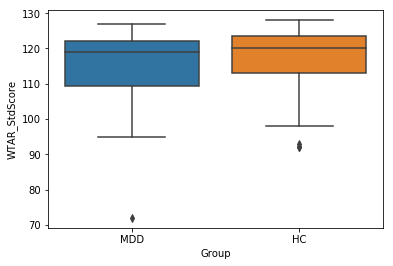

In [18]:
print 'WTAR'
misc.ttest_2s(sr[sr.Group == 'HC']['WTAR_StdScore'],sr[sr.Group == 'MDD']['WTAR_StdScore'])

sns.boxplot(y='WTAR_StdScore', x='Group', data=sr)

print sr.groupby('Group')['WTAR_StdScore'].mean()
print sr.groupby('Group')['WTAR_StdScore'].std()

# PST Train

In [19]:
# Assemble the PST training data

%cd {path2data}

train_dfs = []
train_d = re.compile('fMRI_train')

subjects = !ls -d RMD*

for subject in subjects:
    file_list = [] # Some subjects have multiple training files, e.g. due to restart after scanner issue.
    curr_path = path2data + subject + "/"
    for root, dirs, files in os.walk(curr_path):
        for filename in files:
            train_m = train_d.search(filename)
            if train_m:
                file_path = curr_path + filename
                file_list.append(file_path)

        newest_train_file = file_list[-1:][0] # Select the newest training file as it's most likely to be correct.
#     print newest_train_file
    train_df = pd.read_csv(newest_train_file)
    train_df['subject'] = subject
    train_dfs.append(train_df)
                
train_data = pd.concat(train_dfs)
train_data['lnRT'] = train_data.trial_RT.apply(np.log)
train_columns = ['subject','group','trial_num','block','trial_RT','lnRT','accuracy',
                 'left_stim','left_stim_number','right_stim','right_stim_number',
                 'object_onset','object_duration','response','response_onset','isi_onset',
                 'isi_duration','scheduled_outcome','feedback','feedback_onset',
                 'feedback_duration','iti_onset','iti_duration']

/Users/ebarrick/Work/Dillon/Expts/REWMEM/Version4/Data


In [20]:
# train_data.subject.unique()

In [21]:
train_data['group'].replace(0, 'HC',inplace=True)
train_data['group'].replace(1, 'MDD',inplace=True)

train_data = train_data.reindex(columns=train_columns)

In [22]:
#Merging the PST train data with the self report data
train_full = pd.merge(left=train_data, right=sr, left_on='subject',right_on='subject')

In [23]:
def OutCheck(in_df):
    """Function to look for outliers, judged based on lnRT."""
    dfs = []
    for sub in in_df.subject.unique():
        outlier = []
        sdf = in_df[in_df.subject == sub]
        for i, row_i in sdf.iterrows():
            if row_i.trial_RT < 0.01: # Added to catch trials with too fast RTs (< 100 ms)
                outlier.append(1)
            elif np.isnan(row_i.lnRT):
                outlier.append(np.nan)
            elif abs(row_i.lnRT-sdf.lnRT.mean()) <= sdf.lnRT.std()*3:
                outlier.append(0)
            else:
                outlier.append(1)
        sdf['outlier'] = outlier
        dfs.append(sdf)
    out = pd.concat(dfs)
    return out

train = OutCheck(train_full)

In [24]:
# Not many outliers--fewer than 1.7% of training trials, on average, per group
df = misc.MakeFrame(in_df=train,id_vars=['group','subject'],dv='outlier')
df['out_pct'] = df.outlier*100

print df.groupby('group')['out_pct'].mean()
print df.groupby('group')['out_pct'].std()

group
HC     1.579457
MDD    1.380678
Name: out_pct, dtype: float64
group
HC     2.333330
MDD    2.160058
Name: out_pct, dtype: float64


In [25]:
# Let's look at the number of no-response trials by subject . . . this only partially matches with the <90% below.
# RMD039 is not in that last, but RMD045 is and here he/she appears to have only 1 no-resp trial. Similar with RMD082,
# only 11 no-resp trials here but is on the list below. What explains the difference? 

# RMD045 only completed 3 blocks and thus is missing 60 trials--with 1 no-resp and 179 trials
# with a response, that's 180 trials = 3 blocks x 60 trials per block. No explanation in Notes.

# RMD082 only completed 131 trials--got up to trial 11 of block 3, then stopped. Consistent with Notes, which 
# indicate that this subject was removed from scanner.

# no_resp = train[train.trial_RT == 999]
# no_resp['subject'].value_counts()

In [26]:
# Count number of trials with no response, drop them, and drop outliers.
print 'Number of trials with no response: ' + str(len(train[train.trial_RT == 999])) 
train_clean = train[~((train.trial_RT == 999) | (train.outlier == 1))]

Number of trials with no response: 594


In [27]:
def make_pair(left_stim):
    '''Use the left stimulus number to deduce what pair was onscreen, then return it.'''
    d = {1:'AB', 2:'CD',3:'EF',4:'EF',5:'CD',6:'AB'}
    pair = d[left_stim]
    return pair

train_clean['pair'] = train_clean.left_stim_number.apply(make_pair)

In [28]:
# Looks right . . . 
train_clean[['left_stim_number','right_stim_number','pair']].head()

,left_stim_number,right_stim_number,pair
0,2,5,CD
1,3,4,EF
2,1,6,AB
3,1,6,AB
4,5,2,CD


In [29]:
# Find out which participants responded <90% of the time, and put them in a list so we can exclude them for 
# all the upcoming analyses. Don't exclude RMD045, though, as he/she has only 3 blocks but data are clean.

asleep = []
g = train_clean.groupby(['subject', 'group']).trial_num.count()
df = g.to_frame()
df.reset_index(inplace=True)

for i, row_i in df.iterrows():
    if row_i.trial_num < 216 and row_i.subject != 'RMD045':
        print row_i.subject, row_i.group, row_i.trial_num
        asleep.append(row_i.subject)

RMD006 HC 191
RMD015 HC 201
RMD039 HC 139
RMD068 MDD 190
RMD077 MDD 189
RMD082 MDD 120


In [30]:
asleep

['RMD006', 'RMD015', 'RMD039', 'RMD068', 'RMD077', 'RMD082']

I think it makes sense to drop these subjects, with the exception of RMD045 who completed 3 blocks with only 1 non-response. We can run the analyses with and without them and report the data both ways, but for now I will drop.

In [31]:
train_clean = train_clean[~(train_clean.subject.isin(asleep))]
train_clean.reset_index(inplace=True)

### Train Reaction Time

In [32]:
# Single subject data, raw and log transformed RT with normal distribution overlaid to detect deviations.
# lnRT is a definite improvement; note that some people have bimodal distributions (RMD048) and/or some very long
# RTs (RMD029)
# g = sns.FacetGrid(data=train_clean,col='subject',col_wrap=4)
# g.map(sns.distplot,'trial_RT',kde=True,fit=sp.stats.norm)
# g.map(sns.distplot,'lnRT',kde=True,fit=sp.stats.norm,color='orange')

DA function declines with Age, so I'm adding that to all analyses as a covariate.

In [33]:
# Cleaning up a couple of variables, then pushing to R

train_clean.Education_Level = train_clean.Education_Level.astype(str)
train_clean.Occupation = train_clean.Occupation.astype(str)
train_clean['Highest Degree'] = train_clean['Highest Degree'].astype(str)
train_clean.Income = train_clean.Income.astype(str)
del train_clean['Notes']

%Rpush train_clean
# %R str(train_clean) # Always run this to take a look at what you have
%R train_clean$block <- as.factor(train_clean$block)

%R train_rt.acov <- aov_ez(id='subject', dv='lnRT', data=train_clean, between='group', within=c('pair','block'),\
                         covariate='Age',factorize=FALSE, anova_table=list(correction='GG',es='pes'))
%R print(train_rt.acov) # Main effects of Age, Group, and Block

/Users/ebarrick/anaconda/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Contrasts set to contr.sum for the following variables: group

  warnings.warn(x, RRuntimeWarning)


Anova Table (Type 3 tests)

Response: lnRT
             Effect           df  MSE      F  pes p.value
1             group        1, 76 0.44   1.20  .02     .28
2               Age        1, 76 0.44 5.98 *  .07     .02
3              pair 1.98, 150.47 0.04   1.15  .01     .32
4        group:pair 1.98, 150.47 0.04   0.45 .006     .64
5          Age:pair 1.98, 150.47 0.04   0.39 .005     .67
6             block 1.84, 139.94 0.08 3.95 *  .05     .02
7       group:block 1.84, 139.94 0.08   0.29 .004     .73
8         Age:block 1.84, 139.94 0.08   0.47 .006     .61
9        pair:block 5.08, 386.39 0.01   1.07  .01     .38
10 group:pair:block 5.08, 386.39 0.01   0.92  .01     .47
11   Age:pair:block 5.08, 386.39 0.01   1.01  .01     .41
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘+’ 0.1 ‘ ’ 1

Sphericity correction method: GG 


Correlation between Age and training RT, r = 0.283, p = 0.011.


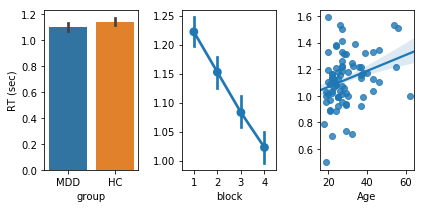

In [35]:
# Plotting the effects
fig, (ax1,ax2,ax3) = plt.subplots(1,3,sharex=False,sharey=False,figsize=(6,3))
sns.barplot(y='trial_RT',x='group',units='subject',ci=68,data=train_clean,ax=ax1)
ax1.set_ylabel('RT (sec)')
sns.pointplot(y='trial_RT',x='block',units='subject',ci=68,data=train_clean,ax=ax2)
ax2.set_ylabel('')

# Average within subjects for the correlation with Age . . . 
df = misc.MakeFrame(in_df=train_clean,id_vars=['subject','group','Age'],dv='trial_RT')
sns.regplot(y='trial_RT',x='Age',ci=68,data=df,ax=ax3)
ax3.set_ylabel('')

fig.tight_layout()
plt.savefig(path2figs + 'RMD_PST_train_RT.pdf'.format(g))

r, p = sp.stats.pearsonr(df.Age,df.trial_RT)
print 'Correlation between Age and training RT, r = ' + '{:.3}'.format(r) + ', p = ' + '{:.3}'.format(p) + '.'

In [36]:
# Follow-up the Block effect . . . all pairwise comparisons are significant

%R block_RT.lsm <- lsmeans(train_rt.acov, ~ block)
%R print(block_RT.lsm) # Shows the least square means, looks right
%R print(pairs(block_RT.lsm)) # All pairwise comparisons are significant

/Users/ebarrick/anaconda/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: NOTE: Results are based on intra-block estimates.

  warnings.warn(x, RRuntimeWarning)
/Users/ebarrick/anaconda/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: NOTE: Results may be misleading due to involvement in interactions

  warnings.warn(x, RRuntimeWarning)


 block    lsmean         SE    df    lower.CL  upper.CL
 X1    0.3074285 0.07231442 79.52  0.16350492 0.4513521
 X2    0.2355173 0.07231442 79.52  0.09159373 0.3794410
 X3    0.1723763 0.07231442 79.52  0.02845266 0.3162999
 X4    0.1144191 0.07232587 79.57 -0.02952593 0.2583641

Results are averaged over the levels of: group, pair 
Confidence level used: 0.95 


 contrast   estimate         SE  df t.ratio p.value
 X1 - X2  0.07191119 0.02009006 227   3.579  0.0024
 X1 - X3  0.13505226 0.02009006 227   6.722  <.0001
 X1 - X4  0.19300946 0.02017232 227   9.568  <.0001
 X2 - X3  0.06314107 0.02009006 227   3.143  0.0102
 X2 - X4  0.12109827 0.02017232 227   6.003  <.0001
 X3 - X4  0.05795720 0.02017232 227   2.873  0.0229

Results are averaged over the levels of: group, pair 
P value adjustment: tukey method for comparing a family of 4 estimates 


### Train Accuracy

In [37]:
# Group x Block x Pair, with Age as a covariate

%R train_acc.acov <- aov_ez(id='subject', dv='accuracy', data=train_clean, between='group',within=c('pair','block'),\
                          covariate='Age',factorize=FALSE, anova_table=list(correction='GG',es='pes'))

%R print (train_acc.acov) # Pair x Block and Age x Pair x Block interactions

Anova Table (Type 3 tests)

Response: accuracy
             Effect           df  MSE       F  pes p.value
1             group        1, 76 0.15    0.37 .005     .54
2               Age        1, 76 0.15    0.34 .005     .56
3              pair 1.62, 123.11 0.08    2.07  .03     .14
4        group:pair 1.62, 123.11 0.08    0.85  .01     .41
5          Age:pair 1.62, 123.11 0.08    0.92  .01     .38
6             block 2.66, 202.36 0.04    0.68 .009     .55
7       group:block 2.66, 202.36 0.04    1.62  .02     .19
8         Age:block 2.66, 202.36 0.04    0.73 .010     .52
9        pair:block 5.31, 403.62 0.03 3.60 **  .05    .003
10 group:pair:block 5.31, 403.62 0.03    0.88  .01     .50
11   Age:pair:block 5.31, 403.62 0.03 3.89 **  .05    .001
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘+’ 0.1 ‘ ’ 1

Sphericity correction method: GG 


In [38]:
train_clean.subject.nunique()

80

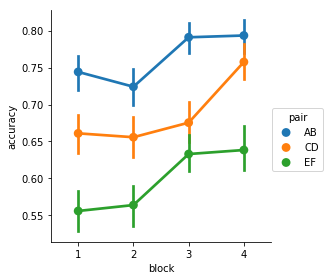

In [39]:
# Here's the Pair x Block interaction . . . I'm not going further with the Age x Pair x Block b/c I'd have to 
# dichotomize on Age, which is artificial, and at any rate I don't care about Age all that much (just don't want it
# obscuring any Group differences).

sns.factorplot(y='accuracy',x='block',hue='pair',hue_order=['AB','CD','EF'],units='subject',ci=68,
               data=train_clean)
plt.savefig(path2figs + 'RMD_PST_train_acc.pdf'.format(g))

Rather than running pairwise tests (as I did in the next cell), we should really run follow-up ANOVAs here: one-ways on Pair at each Block, and one-ways on Block for each Pair. Haven't done that yet but will do in the near future . . .

In [40]:
# Now use lsmeans to decompose the Pair x Block effect. Basically, accuracy on AB starts high and stays high,
# accuracy on CD and EF improve over time (but it's a bit bumpy), accuracy on AB is always better than accuracy on EF,
# and accuracy on CD is intermediate, better than EF in Blocks 1 and 4. All this is with Tukey HSD so the correction
# is relatively stringent due to the number of comparisons.

# Okay, slicing by Pair first . . . 
# AB does not differ significantly over the blocks;
# CD: Blk4 > Blk 1|Blk 2|Blk 3 ( Blk 4 > Blk 3, p = 0.06)
# EF: Blk 4|Blk 3 > Blk 1 (trends)

# Now slice by Block . . . 
# Block 1: AB|CD > EF; Block 2: AB > EF; Block 3: AB > CD|EF; Block 4: AB|CD > EF

%R pb_acc.lsm <- lsmeans(train_acc.acov, ~ block*pair)
%R print(pb_acc.lsm) # Looks right . . . 
%R print(pairs(pb_acc.lsm))

 block pair    lsmean         SE     df  lower.CL  upper.CL
 X1    AB   0.7184159 0.04599269 113.04 0.6272964 0.8095353
 X2    AB   0.6991101 0.04599269 113.04 0.6079907 0.7902296
 X3    AB   0.7664588 0.04599269 113.04 0.6753394 0.8575783
 X4    AB   0.7655407 0.04602282 113.33 0.6743641 0.8567173
 X1    CD   0.6354579 0.04599269 113.04 0.5443384 0.7265773
 X2    CD   0.6293361 0.04599269 113.04 0.5382167 0.7204556
 X3    CD   0.6514513 0.04599269 113.04 0.5603319 0.7425708
 X4    CD   0.7292587 0.04602282 113.33 0.6380820 0.8204353
 X1    EF   0.5307473 0.04599269 113.04 0.4396278 0.6218667
 X2    EF   0.5382143 0.04599269 113.04 0.4470948 0.6293337
 X3    EF   0.6065015 0.04599269 113.04 0.5153820 0.6976209
 X4    EF   0.6141415 0.04602282 113.33 0.5229648 0.7053181

Results are averaged over the levels of: group 
Confidence level used: 0.95 


 contrast           estimate         SE     df t.ratio p.value
 X1,AB - X2,AB  0.0193057393 0.02599391 643.14   0.743  0.9999
 X1,AB - X3,AB -0.0480429489 0.02599391 643.14  -1.848  0.7904
 X1,AB - X4,AB -0.0471248726 0.02610035 643.14  -1.806  0.8147
 X1,AB - X1,CD  0.0829579843 0.02918410 445.18   2.843  0.1661
 X1,AB - X2,CD  0.0890797490 0.03110670 530.86   2.864  0.1572
 X1,AB - X3,CD  0.0669645265 0.03110670 530.86   2.153  0.5848
 X1,AB - X4,CD -0.0108427881 0.03115887 532.19  -0.348  1.0000
 X1,AB - X1,EF  0.1876685970 0.02918410 445.18   6.431  <.0001
 X1,AB - X2,EF  0.1802015854 0.03110670 530.86   5.793  <.0001
 X1,AB - X3,EF  0.1119143965 0.03110670 530.86   3.598  0.0180
 X1,AB - X4,EF  0.1042744043 0.03115887 532.19   3.347  0.0411
 X2,AB - X3,AB -0.0673486882 0.02599391 643.14  -2.591  0.2869
 X2,AB - X4,AB -0.0664306119 0.02610035 643.14  -2.545  0.3138
 X2,AB - X1,CD  0.0636522450 0.03110670 530.86   2.046  0.6613
 X2,AB - X2,CD  0.0697740097 0.02918410 445.18   2.391 

In [41]:
# Let's take a look at how often people selected the various stimuli, so we can test out my 'AvoidB accuracy depends
# on how often you chose B during training' hypothesis . . . 

def CodeChoice(data):
    '''Use position of stimuli on screen and response to code choice.'''
    s = {1:'A', 2:'C', 3:'E', 4:'F', 5:'D', 6:'B'}
    
    left_stim, right_stim, response = data
    
    if pd.isnull(response):
        choice = np.nan
    elif response == 'left':
        choice = s[left_stim]
    elif response == 'right':
        choice = s[right_stim]
    
    return choice

train_clean['choice'] = train_clean[['left_stim_number','right_stim_number','response']].apply(CodeChoice,axis=1)
train_clean[['left_stim_number','right_stim_number','response','choice']].head()

,left_stim_number,right_stim_number,response,choice
0,2,5,right,D
1,3,4,right,F
2,1,6,left,A
3,1,6,right,B
4,5,2,left,D


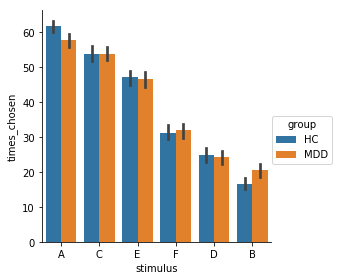

In [42]:
# Interesting pattern in the data below . . . HC > MDD for all the "good" stimuli, MDD > HC for all the "bad" stimuli.
# This is a remarkably clear graph, one of the best I've seen (ever, and certainly for the PST) . . . 
df = train_clean.groupby(['group','subject','Age'])['choice'].value_counts().to_frame('times_chosen').reset_index()
df.head()
new_cols = ['group','subject','Age','stimulus','times_chosen']
df.columns = new_cols
df.head(13)
sns.factorplot(y='times_chosen',x='stimulus',order=['A','C','E','F','D','B'], hue='group',units='subject',
               kind='bar',ci=68,data=df)
plt.savefig(path2figs + 'RMD_PST_Train_Choices.pdf'.format(g))

In [43]:
# I'll run a 2 Group x 2 Stimulus (A,B) ANCOVA on choice, with Age as a covariate.
# (This was significant the first time I ran it, as an ANOVA, not now . . . hopefully will be with more subjects)

choose_ab = df[(df.stimulus == 'A') | (df.stimulus == 'B')]

%Rpush choose_ab
%R choose_ab.acov <- aov_ez(id='subject', dv='times_chosen', within='stimulus', between='group',\
                            covariate='Age', factorize=FALSE, anova_table=list(correction='GG',es='pes'),\
                            data=choose_ab)
%R print(choose_ab.acov)

Anova Table (Type 3 tests)

Response: times_chosen
          Effect    df    MSE         F    pes p.value
1          group 1, 77   4.57      0.00 <.0001     .95
2            Age 1, 77   4.57      1.23    .02     .27
3       stimulus 1, 77 239.22 20.83 ***    .21  <.0001
4 group:stimulus 1, 77 239.22      2.37    .03     .13
5   Age:stimulus 1, 77 239.22      0.39   .005     .53
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘+’ 0.1 ‘ ’ 1


In [44]:
# Run the follow-up tests . . . (this is a holdover from when the interaction was significant)
%R choose_ab.lsm <- lsmeans(choose_ab.acov, ~ stimulus * group)
%R print(choose_ab.lsm) # Looks right

# Okay to turn correction off here b/c only care about HC vs. MDD for A and B, and if
# the correction is not turned off we will adjust for 4 more tests we don't care about . . .
%R print(pairs(choose_ab.lsm,adjust='none')) # HC > MDD for choosing A was sig, now not. Not super strong . . . 

 stimulus group   lsmean       SE    df lower.CL upper.CL
 A        HC    62.27029 1.836818 92.69 58.62257 65.91800
 B        HC    17.28224 1.836818 92.69 13.63453 20.92996
 A        MDD   58.47706 1.840607 93.47 54.82222 62.13190
 B        MDD   21.03408 1.840607 93.47 17.37924 24.68892

Confidence level used: 0.95 


 contrast        estimate       SE   df t.ratio p.value
 A,HC - B,HC    44.988043 3.484999 76.0  12.909  <.0001
 A,HC - A,MDD    3.793226 2.487275 78.9   1.525  0.1312
 A,HC - B,MDD   41.236210 2.487275 78.9  16.579  <.0001
 B,HC - A,MDD  -41.194817 2.487275 78.9 -16.562  <.0001
 B,HC - B,MDD   -3.751834 2.487275 78.9  -1.508  0.1354
 A,MDD - B,MDD  37.442983 3.483896 76.0  10.747  <.0001



group
HC     78.748881
MDD    73.760916
Name: accuracy, dtype: float64
group
HC     13.184162
MDD    14.283291
Name: accuracy, dtype: float64
t(78) = 1.62, p = 0.109, g = 0.363


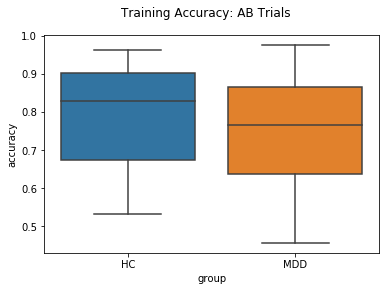

In [45]:
# If the above analysis is correct then it implies there should be a group difference in AB accuracy . . . 
# . . . and there was, but no longer; even if we get back to p < 0.05, it's clear this isn't a very strong result.

train_ab = train_clean[train_clean.pair == 'AB']
df = misc.MakeFrame(in_df=train_ab,id_vars=['group','subject'],dv='accuracy',agg_func='mean')
df.head()

print 100*(df.groupby('group')['accuracy'].mean())
print 100*(df.groupby('group')['accuracy'].std())

misc.ttest_2s(df[df.group == 'HC']['accuracy'],df[df.group == 'MDD']['accuracy'],paired=False)

sns.boxplot(y='accuracy',x='group',data=df)
plt.suptitle('Training Accuracy: AB Trials')
plt.savefig(path2figs + 'RMD_PST_Train_AB_ACC.pdf'.format(g))

## PST Ratings

In [46]:
%cd {path2data}

rate_dfs = []
rate_d = re.compile('_PST_fMRI_ratings')

subjects = !ls -d RMD0*

for sub in subjects:
    
    group = train_full[train_full.subject == sub]['group'].unique()
    if group: # Some subjects (RMD001, RMD002) don't have a group so need to check for that before . . . 
        group = group[0] # . . . pulling the group name out of the list.
    else:
        group = 'none'
        
    curr_path = path2data + sub + "/"
    for root, dirs, files in os.walk(curr_path):
        for filename in files:
            rate_m = rate_d.search(filename)
            if rate_m:
                file_path = curr_path + filename
                rate_df = pd.read_csv(file_path)
                rate_df['group'] = group
                rate_df['subject'] = sub
                rate_dfs.append(rate_df)
                
PST_rate = pd.concat(rate_dfs)
ratings_columns = ['subject','group','stimulus','prompt','rating']
PST_rate = PST_rate.reindex(columns=ratings_columns)
PST_rate = PST_rate[~(PST_rate.group == 'none')] # Drop the pilots
PST_rate = PST_rate[~(PST_rate.subject.isin(asleep))] # Drop the sleepy peeps

/Users/ebarrick/Work/Dillon/Expts/REWMEM/Version4/Data


In [47]:
df = pd.merge(PST_rate,sr,on='subject')
rate = df[['subject','Age','group','stimulus','prompt','rating']]
rate.head()

,subject,Age,group,stimulus,prompt,rating
0,RMD003,43,MDD,reward,valence,9
1,RMD003,43,MDD,zero,valence,1
2,RMD003,43,MDD,reward,arousal,8
3,RMD003,43,MDD,zero,arousal,2
4,RMD004,37,HC,reward,valence,9


In [48]:
# We've got one less subject in the ratings than in the training. Who is it? RMD045--makes sense, quit early (quitter)
print train_clean.subject.nunique()
print rate.subject.nunique()

for sub in train_clean.subject.unique():
    if sub not in rate.subject.unique():
        print sub

80
74
RMD045
RMD102
RMD103
RMD104
RMD105
RMD106


AttributeError: 'module' object has no attribute 'plt'

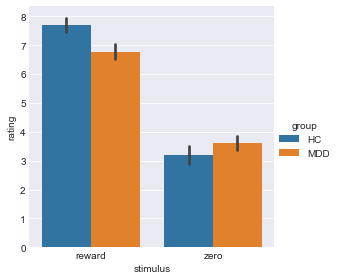

In [49]:
sns.set_style('darkgrid')
sns.factorplot(y='rating',x='stimulus',hue='group',hue_order=['HC','MDD'], units='subject',ci=68,kind='bar',
               data=rate[rate.prompt == 'valence'])
sns.plt.ylabel('valence')
plt.savefig(path2figs + 'PST_Valence.pdf'.format(g))

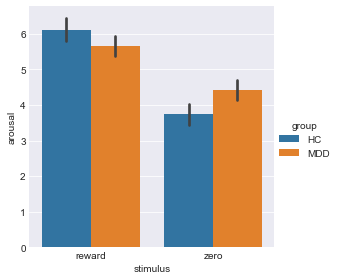

In [51]:
sns.factorplot(y='rating',x='stimulus',hue='group',hue_order=['HC','MDD'], units='subject',ci=68,kind='bar',
               data=rate[rate.prompt == 'arousal'])
plt.ylabel('arousal')
plt.savefig(path2figs + 'PST_Arousal.pdf'.format(g))

In [52]:
# ANCOVAs 

%Rpush rate
%R valence = subset(rate, prompt == 'valence')
%R arousal = subset(rate, prompt == 'arousal')

print 'valence . . .'
%R valence.acov <- aov_ez(id='subject', dv='rating', data=valence, between='group', within=c('stimulus'),\
                        covariate='Age',factorize=FALSE,anova_table=list(correction='GG',es='pes'))
%R print(valence.acov) # Main effect of Stim, plus Group x Stim

print '\narousal . . .'
%R arousal.acov <- aov_ez(id='subject', dv='rating', data=arousal, between='group', within=c('stimulus'),\
                        covariate='Age',factorize=FALSE,anova_table=list(correction='GG',es='pes'))
%R print(arousal.acov) # Main effect of Stim, plus Group x Stim

valence . . .


Anova Table (Type 3 tests)

Response: rating
          Effect    df  MSE         F   pes p.value
1          group 1, 71 1.39      1.78   .02     .19
2            Age 1, 71 1.39      0.48  .007     .49
3       stimulus 1, 71 4.24 12.91 ***   .15   .0006
4 group:stimulus 1, 71 4.24    3.89 +   .05     .05
5   Age:stimulus 1, 71 4.24      0.01 .0002     .91
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘+’ 0.1 ‘ ’ 1



arousal . . .


Anova Table (Type 3 tests)

Response: rating
          Effect    df  MSE      F   pes p.value
1          group 1, 71 4.14   0.15  .002     .70
2            Age 1, 71 4.14   0.24  .003     .62
3       stimulus 1, 71 3.02 4.59 *   .06     .04
4 group:stimulus 1, 71 3.02 3.85 +   .05     .05
5   Age:stimulus 1, 71 3.02   0.04 .0006     .84
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘+’ 0.1 ‘ ’ 1


In [53]:
# Follow-ups on valence. Nice, group difference in valence for rewards, not zeros . . . 

%R valence.lsm <- lsmeans(valence.acov, ~ group*stimulus)
%R print(valence.lsm)
%R print(pairs(valence.lsm),adjust='none')

 group stimulus   lsmean        SE     df lower.CL upper.CL
 HC    reward   7.967934 0.4077732 126.09 7.160968 8.774899
 MDD   reward   7.037304 0.4185728 126.14 6.208970 7.865638
 HC    zero     3.441899 0.4077732 126.09 2.634934 4.248865
 MDD   zero     3.855330 0.4185728 126.14 3.026996 4.683664

Confidence level used: 0.95 


 contrast                 estimate        SE     df t.ratio p.value
 HC,reward - MDD,reward  0.9306299 0.3901681 112.09   2.385  0.0187
 HC,reward - HC,zero     4.5260342 0.4712934  70.00   9.603  <.0001
 HC,reward - MDD,zero    4.1126036 0.3901681 112.09  10.541  <.0001
 MDD,reward - HC,zero    3.5954043 0.3901681 112.09   9.215  <.0001
 MDD,reward - MDD,zero   3.1819736 0.4840161  70.00   6.574  <.0001
 HC,zero - MDD,zero     -0.4134306 0.3901681 112.09  -1.060  0.2916



In [54]:
# Follow-ups on arousal. Neither follow-up is sig but can see controls find rewards more arousing and zeros less
# arousing than the MDDs do . . . 

%R arousal.lsm <- lsmeans(arousal.acov, ~ group*stimulus)
%R print(arousal.lsm)
%R print(pairs(arousal.lsm),adjust='none')

 group stimulus   lsmean        SE    df lower.CL upper.CL
 HC    reward   6.377007 0.6089912 86.89 5.166549 7.587466
 MDD   reward   5.943693 0.6250147 86.91 4.701391 7.185995
 HC    zero     4.003314 0.6089912 86.89 2.792856 5.213773
 MDD   zero     4.694880 0.6250147 86.91 3.452577 5.937182

Confidence level used: 0.95 


 contrast                 estimate        SE     df t.ratio p.value
 HC,reward - MDD,reward  0.4333144 0.4437198 136.69   0.977  0.3305
 HC,reward - HC,zero     2.3736931 0.4022492  70.00   5.901  <.0001
 HC,reward - MDD,zero    1.6821279 0.4437198 136.69   3.791  0.0002
 MDD,reward - HC,zero    1.9403787 0.4437198 136.69   4.373  <.0001
 MDD,reward - MDD,zero   1.2488134 0.4131081  70.00   3.023  0.0035
 HC,zero - MDD,zero     -0.6915653 0.4437198 136.69  -1.559  0.1214



In [55]:
# Let's see if there's any relationship between AB accuracy during training and reward-zero difference scores for
# valence and/or arousal . . . create those difference scores in the next two cells . . . 

df = misc.MakeFrame(in_df=train_ab,id_vars=['group','subject'],dv='accuracy',agg_func='mean')
df.head()

,group,subject,accuracy
0,HC,RMD004,0.935897
1,HC,RMD005,0.531646
2,HC,RMD007,0.739726
3,HC,RMD009,0.925000
4,HC,RMD010,0.787500


In [56]:
valence = PST_rate[PST_rate.prompt == 'valence']
valence = valence.pivot(index='subject',columns='stimulus',values='rating')
valence.reset_index(inplace=True)
valence['valence_Rew_vs_Zero'] = valence['reward'] - valence['zero']
valence.head()

stimulus,subject,reward,zero,valence_Rew_vs_Zero
0,RMD003,9,1,8
1,RMD004,9,1,8
2,RMD005,9,1,8
3,RMD007,6,5,1
4,RMD009,3,7,-4


In [57]:
arousal = PST_rate[PST_rate.prompt == 'arousal']
arousal = arousal.pivot(index='subject',columns='stimulus',values='rating')
arousal.reset_index(inplace=True)
arousal['arousal_Rew_vs_Zero'] = arousal['reward'] - arousal['zero']
arousal.head()

stimulus,subject,reward,zero,arousal_Rew_vs_Zero
0,RMD003,8,2,6
1,RMD004,7,4,3
2,RMD005,2,2,0
3,RMD007,4,3,1
4,RMD009,6,5,1


In [58]:
# Now merge everything for the correlations . . . 
train_rate = pd.merge(valence,arousal,on='subject')
train_rate = train_rate[['subject','valence_Rew_vs_Zero','arousal_Rew_vs_Zero']]

train_corr = pd.merge(df,train_rate,on='subject')
train_corr.head()

,group,subject,accuracy,valence_Rew_vs_Zero,arousal_Rew_vs_Zero
0,HC,RMD004,0.935897,8,3
1,HC,RMD005,0.531646,8,0
2,HC,RMD007,0.739726,1,1
3,HC,RMD009,0.925000,-4,1
4,HC,RMD010,0.787500,6,3


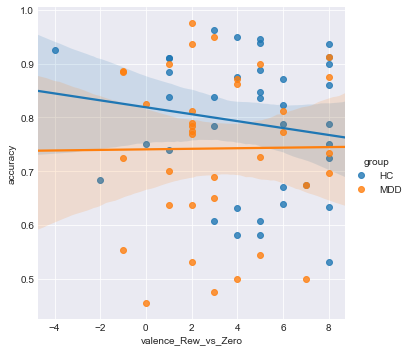

In [59]:
# No relationship . . . 
sns.lmplot(y='accuracy',x='valence_Rew_vs_Zero',hue='group', data=train_corr)

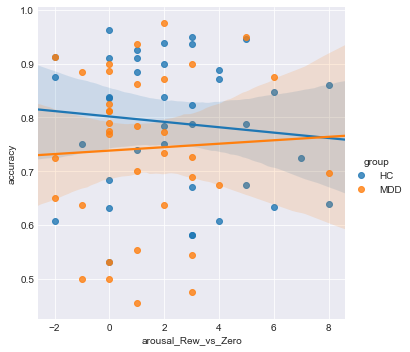

In [60]:
# No relationship . . . 
sns.lmplot(y='accuracy',x='arousal_Rew_vs_Zero',hue='group',data=train_corr)

# PST Test

In [61]:
'''Assemble the PST test data'''

%cd {path2data}

test_dfs = []
test_d = re.compile('PST_test')

subjects = !ls -d RMD*

for sub in subjects:
    curr_path = path2data + sub + "/"
    for root, dirs, files in os.walk(curr_path):
        for filename in files:
            test_m = test_d.search(filename)
            if test_m:
                file_path = curr_path + filename
#                 print file_path
                test_df = pd.read_csv(file_path)
                test_df['subject'] = sub
                test_dfs.append(test_df)
                
test_data = pd.concat(test_dfs)
test_data['lnRT'] = test_data.trial_RT.apply(np.log)
test_columns = ['subject','group','block_id','trial_id','trial_RT','lnRT','trial_accuracy',
                'left_stim_name','left_stim_number','right_stim_name','right_stim_number',
                'response']
test_data = test_data[~(test_data.subject.isin(asleep))] # Drop the sleepy peeps

/Users/ebarrick/Work/Dillon/Expts/REWMEM/Version4/Data


In [62]:
test_data['group'].replace(0, 'HC',inplace=True)
test_data['group'].replace(1, 'MDD',inplace=True)

test_data = test_data.reindex(columns=test_columns)

In [63]:
#Merging the PST test data with the self report data
test_full = pd.merge(left=test_data, right=sr, left_on='subject',right_on='subject')

In [64]:
test_full.subject.nunique()

80

In [68]:
# Looking for outliers . . . not bad 

test = OutCheck(test_full)

print 'Number of trials that are outliers for each subject:'
df2 = test[test['outlier'] == 1]
print df2.groupby('subject')['outlier'].count()

Number of trials that are outliers for each subject:
subject
RMD005    1
RMD009    1
RMD011    1
RMD012    2
RMD013    1
RMD014    4
RMD017    2
RMD018    2
RMD019    2
RMD020    1
RMD021    1
RMD023    1
RMD028    6
RMD029    5
RMD032    1
RMD033    1
RMD034    1
RMD035    1
RMD036    2
RMD037    1
RMD040    1
RMD041    1
RMD042    1
RMD045    1
RMD047    1
RMD048    1
RMD050    1
RMD051    1
RMD053    1
RMD054    1
RMD055    1
RMD056    1
RMD057    1
RMD058    1
RMD061    2
RMD064    1
RMD065    1
RMD067    1
RMD075    1
RMD076    1
RMD078    2
RMD079    1
RMD081    2
RMD084    1
RMD085    1
RMD086    1
RMD089    1
RMD091    1
RMD092    1
RMD093    1
RMD097    1
RMD098    1
RMD102    1
RMD103    1
RMD105    2
RMD106    3
Name: outlier, dtype: int64


In [69]:
# Count number of trials with no response, drop them, and drop outliers.
print 'Number of trials with no response: ' + str(len(test[test.trial_RT == 999])) 
test_clean = test[~((test.trial_RT == 999) | (test.outlier == 1))]

Number of trials with no response: 46


In [70]:
# Clean up the same variables that give R fits . . . 
test_clean.Education_Level = test_clean.Education_Level.astype(str)
test_clean.Occupation = test_clean.Occupation.astype(str)
test_clean['Highest Degree'] = test_clean['Highest Degree'].astype(str)
test_clean.Income = test_clean.Income.astype(str)
del test_clean['Notes']

In [71]:
#Make a pair column
def make_test_pair(data):
    '''Use left and right stimulus to output pair'''
    left_stim, right_stim = data
    d = {1:'A',2:'C',3:'E',4:'F',5:'D',6:'B'}
    left_char = d[left_stim]
    right_char = d[right_stim]
    pair = left_char + right_char
    return pair

test_clean['pair'] = test_clean[['left_stim_number','right_stim_number']].apply(make_test_pair, axis=1)

In [72]:
test_clean[['left_stim_number','right_stim_number','pair']].head()

,left_stim_number,right_stim_number,pair
0,1,2,AC
1,5,4,DF
2,3,6,EB
3,3,5,ED
4,6,5,BD


In [73]:
# Now code trials as ChooseA, AvoidB, or neither
def code_trial_type(pair):
    '''Categorize choice pairs as 'ChooseA', 'AvoidB', or 'neither'.'''
    
    if pair == 'AB' or pair == 'BA':
        choice = 'neither'
    elif 'A' in pair:
        choice = 'ChooseA'
    elif 'B' in pair:
        choice = 'AvoidB'
    else:
        choice = 'neither'
    
    return choice

test_clean['trial_type'] = test_clean.pair.apply(code_trial_type)
test_clean[['pair','trial_type']].head()

,pair,trial_type
0,AC,ChooseA
1,DF,neither
2,EB,AvoidB
3,ED,neither
4,BD,AvoidB


In [74]:
# Adding the difference/discrepany b/w stimuli in reinforcement rate and the participant's choice
def AddDisChoice(data):
    '''Given the left and right stim numbers, plus the subject's response, add the discrepancy b/w reward 
    probabilities for the stimuli, and the participant's choice.'''
    
    left_stim_number, right_stim_number, response = data
    choice = np.nan
    discrepancy = np.nan
    
    stims = {1:('A',80),2:('C',70),3:('E',60),4:('F',40),5:('D',30),6:('B',20)}
    
    discrepancy = np.abs(stims[left_stim_number][1] - stims[right_stim_number][1])
    
    if response == 'left':
        choice = stims[left_stim_number][0]
    elif response == 'right':
        choice = stims[right_stim_number][0]
    
    return (discrepancy,choice)

test_clean['difference'],test_clean['choice']= zip(*test_clean[['left_stim_number','right_stim_number',
                                                            'response']].apply(AddDisChoice,axis=1))

In [75]:
#Find out which participants responded <90% of the time -- none!
g = test_clean.groupby(['subject', 'group']).trial_id.count()
df = g.to_frame()
df.reset_index(inplace=True)

df.loc[(df["trial_id"] < 162)]

,subject,group,trial_id


In [76]:
test_clean[['left_stim_number','right_stim_number','response','pair','choice','difference']].head()

,left_stim_number,right_stim_number,response,pair,choice,difference
0,1,2,right,AC,C,10
1,5,4,right,DF,F,10
2,3,6,left,EB,E,40
3,3,5,left,ED,E,30
4,6,5,left,BD,B,10


In [77]:
# Important, need to screen out people who perform poorly on test AB trials, logic being that if they cannot
# discriminate between the most obvious pair they've been tested on repeatedly, the rest of their data == worthless.
# Frank et al. (2004) drop anyone not > 50% accurate on AB test trials . . . let's see who that is . . . 

test_ab_drop = []
test_ab = test_clean[test_clean.pair == 'AB']
screen_test = misc.MakeFrame(in_df=test_ab,id_vars=['subject'],dv='trial_accuracy')
for i, row_i in screen_test.iterrows():
    if row_i.trial_accuracy < 0.501:
        print row_i.subject, row_i.trial_accuracy
        test_ab_drop.append(row_i.subject) # 9 subjects dropped . . . 

RMD007 0.0
RMD029 0.333333333333
RMD043 0.166666666667
RMD070 0.166666666667
RMD075 0.5
RMD078 0.5
RMD084 0.333333333333
RMD085 0.4
RMD091 0.4


In [78]:
# Dropping those 9 . . . leaves us with 37 controls and 34 MDDs . . . 
print test_clean.subject.nunique()
test_clean = test_clean[~(test_clean.subject.isin(test_ab_drop))]
print test_clean.subject.nunique()

test_clean.groupby('group')['subject'].nunique()

80
71


group
HC     37
MDD    34
Name: subject, dtype: int64

## Choose A vs. Avoid B

## RT

In [79]:
# We don't really need to plot this every time, but I like it because it very clear shows why we do the log transform.
# You can see that the blue distribution doesn't fit the normal distribution well because of the positive skew, which
# leaves the peak shifted left relative to normal. The orange (ln) distribution fits much better for most subjects.

# Single subject data, raw and log transformed RT with normal distribution overlaid.
# g = sns.FacetGrid(data=test_clean,col='subject',col_wrap=4)
# g.map(sns.distplot,'trial_RT',kde=True,fit=sp.stats.norm) 
# g.map(sns.distplot,'lnRT',kde=True,fit=sp.stats.norm,color='orange')

In [80]:
chAavB = test_clean[~(test_clean.trial_type == 'neither')]

In [81]:
# ANCOVA on RT

%Rpush chAavB
# %R str(test_choice)

%R chAavB_rt.acov <- aov_ez(id='subject', dv='lnRT', data=chAavB, between='group',\
                            within=c('trial_type','trial_accuracy'),\
                            covariate='Age',factorize=FALSE, anova_table=list(correction='GG',es='pes'))
%R print(chAavB_rt.acov) # With Age in here, there is only a trend for an effect of trial type

Anova Table (Type 3 tests)

Response: lnRT
                            Effect    df  MSE    F  pes p.value
1                            group 1, 46 0.27 0.92  .02     .34
2                              Age 1, 46 0.27 0.18 .004     .68
3                       trial_type 1, 46 0.06 2.68  .06     .11
4                 group:trial_type 1, 46 0.06 1.18  .03     .28
5                   Age:trial_type 1, 46 0.06 0.22 .005     .64
6                   trial_accuracy 1, 46 0.03 0.64  .01     .43
7             group:trial_accuracy 1, 46 0.03 1.53  .03     .22
8               Age:trial_accuracy 1, 46 0.03 0.14 .003     .71
9        trial_type:trial_accuracy 1, 46 0.04 2.40  .05     .13
10 group:trial_type:trial_accuracy 1, 46 0.04 0.18 .004     .67
11   Age:trial_type:trial_accuracy 1, 46 0.04 1.02  .02     .32
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘+’ 0.1 ‘ ’ 1


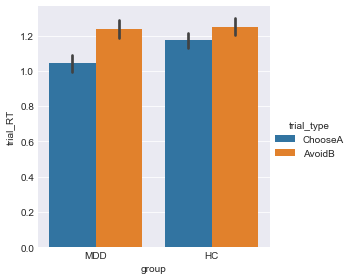

In [82]:
# This isn't justified by the ANCOVA, but let's check out what's happening with the groups . . . 
# Let's look at the Group x TT on correct trials . . . if anything, MDD < HC on Choose A (that's unexpected).

sns.factorplot(y='trial_RT',x='group',hue='trial_type',hue_order=['ChooseA','AvoidB'], units='subject',ci=68,
               kind='bar', data=chAavB[chAavB.trial_accuracy == 1], order = ['MDD','HC'])

In [83]:
# Let's get descriptives for the TT effect . . . people are faster on Choose A than on Avoid B
df = misc.MakeFrame(in_df=chAavB,id_vars=['group','subject','trial_type'],dv=['trial_RT','lnRT'])
df.head()

print df.groupby('trial_type')['trial_RT'].mean()
print df.groupby('trial_type')['trial_RT'].std()

trial_type
AvoidB     1.288052
ChooseA    1.140178
Name: trial_RT, dtype: float64
trial_type
AvoidB     0.296776
ChooseA    0.280830
Name: trial_RT, dtype: float64


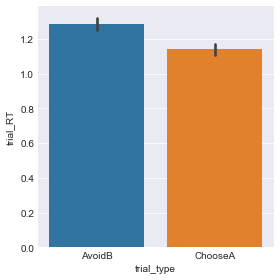

In [84]:
sns.factorplot(y='trial_RT', x='trial_type', units='subject', kind='bar', ci=68, data=df)
plt.savefig(path2figs + 'PST_Test_ChA_vs_AvB_RT.pdf'.format(g))

### Accuracy

In [85]:
# No effects at all on accuracy . . . not unusual for there to be no TT effect, was hoping we'd see a Group effect.
%R chAavB_acc.acov <- aov_ez(id='subject',dv='trial_accuracy', within='trial_type', between='group', data=chAavB,\
                           covariate='Age',factorize=FALSE,anova_table=list(correction='GG',es='pes'))
%R print(chAavB_acc.acov)

Anova Table (Type 3 tests)

Response: trial_accuracy
            Effect    df  MSE    F   pes p.value
1            group 1, 68 0.04 0.02 .0002     .90
2              Age 1, 68 0.04 0.04 .0006     .85
3       trial_type 1, 68 0.08 0.19  .003     .66
4 group:trial_type 1, 68 0.08 0.28  .004     .60
5   Age:trial_type 1, 68 0.08 0.28  .004     .60
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘+’ 0.1 ‘ ’ 1


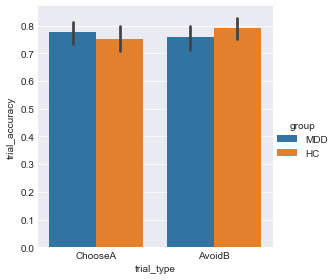

In [86]:
# Nothing doing, and if anything the MDDs are worse on Avoid B . . . interesting, and runs counter to my 
# "number of times you choose B during training predicts Avoid B accuracy at test" hypothesis.

sns.factorplot(y='trial_accuracy',x='trial_type',hue='group',units='subject',ci=68,kind='bar',data=chAavB,
              hue_order = ['MDD','HC'])
plt.savefig(path2figs + 'PST_Test_ChA_vs_AvB_Acc.pdf'.format(g))

In [87]:
# Typically there's a strong correlation b/w ChA-AvB accuracy and RT diffs at test, let's see if that's true for us

df = misc.MakeFrame(in_df=chAavB,id_vars=['subject','group','trial_type'],dv=['trial_accuracy','trial_RT'])
df.head()

,subject,group,trial_type,trial_accuracy,trial_RT
0,RMD003,MDD,AvoidB,0.729167,0.899667
1,RMD003,MDD,ChooseA,0.416667,1.001396
2,RMD004,HC,AvoidB,0.937500,1.239604
3,RMD004,HC,ChooseA,0.958333,1.117208
4,RMD005,HC,AvoidB,0.979167,1.197042


In [88]:
chA = df[df.trial_type == 'ChooseA']
chA_cols = ['subject','group','trial_type','chA_acc','chA_RT']
chA.columns = chA_cols
chA = chA[['subject','group','chA_acc','chA_RT']]

avB = df[df.trial_type == 'AvoidB']
avB_cols = ['subject','group','trial_type','avB_acc','avB_RT']
avB.columns = avB_cols
avB = avB[['subject','avB_acc','avB_RT']]

both = pd.merge(chA,avB,on='subject')
both['chA_vs_avB_acc'] = both.chA_acc - both.avB_acc
both['chA_vs_avB_RT'] = both.chA_RT - both.avB_RT
both.head()

,subject,group,chA_acc,chA_RT,avB_acc,avB_RT,chA_vs_avB_acc,chA_vs_avB_RT
0,RMD003,MDD,0.416667,1.001396,0.729167,0.899667,-0.312500,0.101729
1,RMD004,HC,0.958333,1.117208,0.937500,1.239604,0.020833,-0.122396
2,RMD005,HC,0.229167,1.352125,0.979167,1.197042,-0.750000,0.155083
3,RMD009,HC,0.729167,1.321875,0.979167,1.443562,-0.250000,-0.121688
4,RMD010,HC,0.958333,1.255729,0.625000,1.352813,0.333333,-0.097083


r = -0.671, p = 1.47e-10


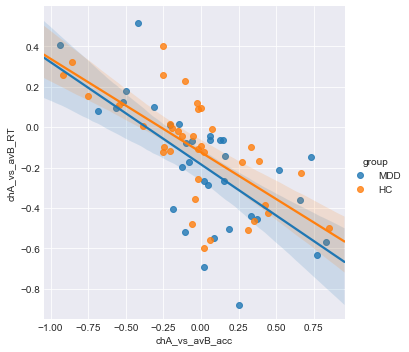

In [89]:
# Yup, as expected--looks good. 
sns.lmplot(y='chA_vs_avB_RT', x='chA_vs_avB_acc', hue='group', data=both)
plt.savefig(path2figs + 'PST_Test_chA_avB_ACC_RT_correl.pdf'.format(g))

r, p = sp.stats.pearsonr(both.chA_vs_avB_RT,both.chA_vs_avB_acc)
print 'r = ' + '{:.3f}'.format(r) + ', p = ' + '{:.3}'.format(p)

## Comparing win/win, lose/lose, and win/lose trials . . .  

Another thing we can do with the test data . . . win/win (high conflict Go) trials (AC, AE, CE) vs. lose/lose (high conflict NoGo trials) (BD, BF, DF), vs. win/lose (low conflict Go) trials (AD, AF, CB, CF, EB, ED).

In [90]:
test_clean.pair.unique()

array(['AC', 'DF', 'EB', 'ED', 'BD', 'FB', 'CE', 'EF', 'BA', 'AF', 'CD',
       'BC', 'CF', 'AD', 'AE', 'EC', 'BE', 'DA', 'FD', 'BF', 'DE', 'AB',
       'DB', 'FE', 'CB', 'CA', 'FA', 'EA', 'FC', 'DC'], dtype=object)

In [91]:
def CodeCon(pair):
    '''Code each pair as win/win (high conflict Go), lose/lose (high conflict NoGo), or win/lose (low conflict Go).'''
    
    trained = ['AB','BA','CD','DC','EF','FE']
    ww = ['AC','CA','AE','EA','CE','EC']
    ll = ['BD','DB','BF','FB','DF','FD']
    wl = ['AD','DA','AF','FA','CB','BC','CF','FC','EB','BE','ED','DE']
    
    if pair in trained:
        out = 'trained'
    elif pair in ww:
        out = 'WW'
    elif pair in ll:
        out = 'LL'
    elif pair in wl:
        out = 'WL'
    else:
        print "pair = " + pair + "; I don't recognize that pair, stopping!"
        out = 'none'
    
    return out

test_clean['con_trial_type'] = test_clean.pair.apply(CodeCon) # Conflict trial type

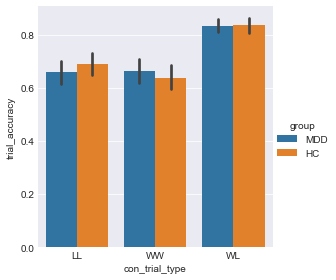

In [94]:
# Accuracy
sns.factorplot(y='trial_accuracy',x='con_trial_type',hue='group',units='subject',ci=68,kind='bar',
               order=['LL','WW','WL'], data=test_clean[~(test_clean.con_trial_type == 'trained')])
plt.savefig(path2figs + 'trial_acc&trial_type_bygroup.pdf'.format(g))

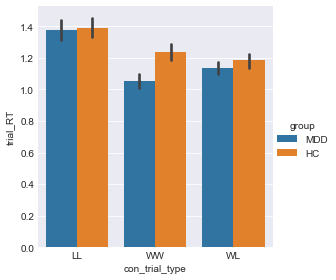

In [95]:
# Correct RT . . . only thing that looks sig here is faster MDD responses on W/W!
corr = test_clean[test_clean.trial_accuracy == 1]
sns.factorplot(y='trial_RT',x='con_trial_type',hue='group',units='subject',ci=68,kind='bar',
               order=['LL','WW','WL'], data=corr[~(corr.con_trial_type == 'trained')])
plt.savefig(path2figs + 'trial_RT&trial_type_bygroup.pdf'.format(g))

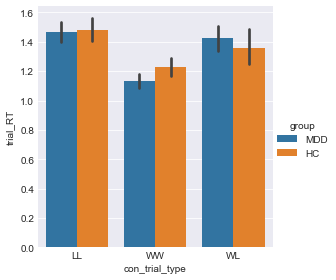

In [96]:
# Error RT
err = test_clean[test_clean.trial_accuracy == 0]
sns.factorplot(y='trial_RT',x='con_trial_type',hue='group',units='subject',ci=68,kind='bar',
               order=['LL','WW','WL'], data=err[~(err.con_trial_type == 'trained')])
plt.savefig(path2figs + 'trial_error_RT&trial_type_bygroup.pdf'.format(g))

In [97]:
# ANCOVAs on accuracy and RT 

test_clean.con_trial_type = test_clean.con_trial_type.astype(str)
con_test = test_clean[~((test_clean.con_trial_type == 'nan') | (test_clean.con_trial_type == 'trained'))]
con_clean = con_test[['subject','Age','group','con_trial_type','trial_accuracy','trial_RT','lnRT']]

%Rpush con_clean
# %R str(con_clean)

%R con_acc.acov <- aov_ez(id='subject',dv='trial_accuracy',within='con_trial_type',between='group',data=con_clean,\
                         covariate='Age',factorize=FALSE,anova_table=list(correction='GG',es='pes'))
%R print(con_acc.acov) # With Age in, no sig effects . . . weird that the TT effect goes away, it is huge . . . 

%R con_RT.acov <- aov_ez(id='subject',dv='lnRT',within=c('con_trial_type','trial_accuracy'),between='group',\
                         covariate='Age',factorize=FALSE,anova_table=list(correction='GG',es='pes'), data=con_clean)

%R print(con_RT.acov) # Group x TT

Anova Table (Type 3 tests)

Response: trial_accuracy
                Effect           df  MSE    F   pes p.value
1                group        1, 68 0.05 0.01 .0002     .91
2                  Age        1, 68 0.05 0.21  .003     .65
3       con_trial_type 1.54, 104.63 0.07 1.64   .02     .20
4 group:con_trial_type 1.54, 104.63 0.07 0.17  .002     .79
5   Age:con_trial_type 1.54, 104.63 0.07 0.62  .009     .50
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘+’ 0.1 ‘ ’ 1

Sphericity correction method: GG 


Anova Table (Type 3 tests)

Response: lnRT
                                Effect           df  MSE      F    pes p.value
1                                group        1, 52 0.46   0.20   .004     .66
2                                  Age        1, 52 0.46   0.00 <.0001     .97
3                       con_trial_type  1.87, 97.21 0.04 3.35 *    .06     .04
4                 group:con_trial_type  1.87, 97.21 0.04 3.45 *    .06     .04
5                   Age:con_trial_type  1.87, 97.21 0.04   0.02  .0004     .97
6                       trial_accuracy        1, 52 0.02   1.57    .03     .22
7                 group:trial_accuracy        1, 52 0.02   0.70    .01     .41
8                   Age:trial_accuracy        1, 52 0.02   1.92    .04     .17
9        con_trial_type:trial_accuracy 1.94, 100.70 0.04   2.08    .04     .13
10 group:con_trial_type:trial_accuracy 1.94, 100.70 0.04   0.13   .003     .87
11   Age:con_trial_type:trial_accuracy 1.94, 100.70 0.04   0.38   .007     .68
---
Signi

In [98]:
# Follow-up on the main effect of Trial Type for accuracy: WL > WW|LL.
%R con_acc.lsm <- lsmeans(con_acc.acov, ~ con_trial_type)
%R print(con_acc.lsm)
%R print(pairs(con_acc.lsm))

 con_trial_type    lsmean         SE   df  lower.CL  upper.CL
 LL             0.6499359 0.05820234 90.1 0.5343085 0.7655632
 WL             0.8139928 0.05820234 90.1 0.6983654 0.9296202
 WW             0.6283928 0.05820234 90.1 0.5127654 0.7440202

Results are averaged over the levels of: group 
Confidence level used: 0.95 


 contrast    estimate         SE  df t.ratio p.value
 LL - WL  -0.16405692 0.03820993 134  -4.294  0.0001
 LL - WW   0.02154307 0.03820993 134   0.564  0.8395
 WL - WW   0.18559999 0.03820993 134   4.857  <.0001

Results are averaged over the levels of: group 
P value adjustment: tukey method for comparing a family of 3 estimates 


In [99]:
# RT: Follow-up on the Group x TT interaction. Impression for the graph confirmed, MDD < HC for WW trials only.
# Needless to say, this is unexpected . . . 
%R gXcon_RT.lsm <- lsmeans(con_RT.acov, ~ group*con_trial_type)
%R print(gXcon_RT.lsm)
%R print(pairs(gXcon_RT.lsm),adjust='none')

 group con_trial_type     lsmean        SE    df    lower.CL  upper.CL
 HC    LL             0.28728316 0.1178356 61.89  0.05172460 0.5228417
 MDD   LL             0.32507927 0.1257774 61.67  0.07362708 0.5765315
 HC    WL             0.21707195 0.1181043 62.45 -0.01898159 0.4531255
 MDD   WL             0.18204633 0.1257805 61.68 -0.06941149 0.4335042
 HC    WW             0.12638956 0.1178569 61.93 -0.10920824 0.3619874
 MDD   WW             0.03910842 0.1258710 61.85 -0.21251610 0.2907330

Results are averaged over the levels of: trial_accuracy 
Confidence level used: 0.95 


 contrast           estimate         SE     df t.ratio p.value
 HC,LL - MDD,LL  -0.03779612 0.07804854  74.15  -0.484  0.6296
 HC,LL - HC,WL    0.07021121 0.03332310 126.00   2.107  0.0371
 HC,LL - MDD,WL   0.10523683 0.07805346  74.17   1.348  0.1817
 HC,LL - HC,WW    0.16089359 0.03058302 126.00   5.261  <.0001
 HC,LL - MDD,WW   0.24817473 0.07819928  74.69   3.174  0.0022
 MDD,LL - HC,WL   0.10800733 0.07845359  75.59   1.377  0.1727
 MDD,LL - MDD,WL  0.14303294 0.03197350 126.00   4.473  <.0001
 MDD,LL - HC,WW   0.19868971 0.07808070  74.26   2.545  0.0130
 MDD,LL - MDD,WW  0.28597085 0.03302516 126.00   8.659  <.0001
 HC,WL - MDD,WL   0.03502562 0.07845848  75.61   0.446  0.6566
 HC,WL - HC,WW    0.09068238 0.03354839 126.00   2.703  0.0078
 HC,WL - MDD,WW   0.17796352 0.07860355  76.13   2.264  0.0264
 MDD,WL - HC,WW   0.05565677 0.07808562  74.28   0.713  0.4782
 MDD,WL - MDD,WW  0.14293791 0.03306002 126.00   4.324  <.0001
 HC,WW - MDD,WW   0.08728114 0.07823138  74.80   1.116 

In [100]:
# RT: follow-up of the accuracy x TT interaction: errors are slower than correct responses for WL, LL, not WW.
%R AccTT_RT.lsm <- lsmeans(con_RT.acov, ~ trial_accuracy*con_trial_type)
%R print(AccTT_RT.lsm)
%R print(pairs(AccTT_RT.lsm),adjust='none')

 trial_accuracy con_trial_type     lsmean        SE    df    lower.CL  upper.CL
 X0             LL             0.35521197 0.1164962 62.73  0.12239332 0.5880306
 X1             LL             0.25715047 0.1164962 62.73  0.02433182 0.4899691
 X0             WL             0.31940281 0.1166339 63.03  0.08633055 0.5524751
 X1             WL             0.07971547 0.1166339 63.03 -0.15335678 0.3127877
 X0             WW             0.10318826 0.1165576 62.86 -0.12974336 0.3361199
 X1             WW             0.06230972 0.1165576 62.86 -0.17062190 0.2952414

Results are averaged over the levels of: group 
Confidence level used: 0.95 


 contrast         estimate         SE     df t.ratio p.value
 X0,LL - X1,LL  0.09806150 0.03109198 176.05   3.154  0.0019
 X0,LL - X0,WL  0.03580916 0.03265786 243.74   1.096  0.2739
 X0,LL - X1,WL  0.27549649 0.03160114 253.46   8.718  <.0001
 X0,LL - X0,WW  0.25202370 0.03183004 243.74   7.918  <.0001
 X0,LL - X1,WW  0.29290224 0.03131841 257.12   9.352  <.0001
 X1,LL - X0,WL -0.06225234 0.03160114 253.46  -1.970  0.0499
 X1,LL - X1,WL  0.17743499 0.03265786 243.74   5.433  <.0001
 X1,LL - X0,WW  0.15396220 0.03131841 257.12   4.916  <.0001
 X1,LL - X1,WW  0.19484074 0.03183004 243.74   6.121  <.0001
 X0,WL - X1,WL  0.23968733 0.03210749 174.78   7.465  <.0001
 X0,WL - X0,WW  0.21621454 0.03330774 243.74   6.491  <.0001
 X0,WL - X1,WW  0.25709308 0.03182636 250.33   8.078  <.0001
 X1,WL - X0,WW -0.02347279 0.03182636 250.33  -0.738  0.4615
 X1,WL - X1,WW  0.01740575 0.03330774 243.74   0.523  0.6017
 X0,WW - X1,WW  0.04087854 0.03154830 175.53   1.296  0.1968

Results are averaged ov

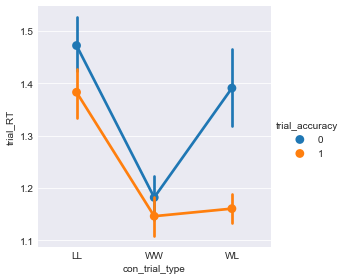

In [101]:
# Here's a look at the accuracy x TT effect on RT . . .
sns.factorplot(y='trial_RT',x='con_trial_type',hue='trial_accuracy',units='subject',ci=68,
               order=['LL','WW','WL'], data=con_clean[~(con_clean.con_trial_type == 'trained')])
plt.savefig(path2figs + 'trial_RT&trial_type_by_trial_acc.pdf'.format(g))

### Looking at the relationship between training accuracy, the discrepancy b/w reinforcment rates for specific stimuli, and test accuracy 

The bottom line so far is that it's very clear there is a trainining accuracy x reinforcement difference interaction, but it's not clear that this varies in a substantive way by group . . . 

In [102]:
# Give me the overall accuracy, collapsed across pair and block, at training for each subject
train_acc = misc.MakeFrame(in_df=train_clean,id_vars='subject',dv='accuracy',agg_func='mean')
new_cols = ['subject','train_acc']
train_acc.columns = new_cols
train_acc.head()

,subject,train_acc
0,RMD003,0.820084
1,RMD004,0.772152
2,RMD005,0.544304
3,RMD007,0.654709
4,RMD009,0.799163


In [103]:
# Now merge those data on training accuracy with the test data
test_train = pd.merge(test_clean,train_acc,on='subject')
test_train.head()
test_train = test_train[~(test_train.con_trial_type == 'trained')] # No trained pairs, want to know about generalizing

In [104]:
# Now generate a df that has each subject's overall training accuracy, plus their mean test accuracy as a function 
# of the difference in reinforcement rates for the pairs onscreen at test (AC = 10% diff, 80 vs. 70%, AD = 50%, etc).

df = misc.MakeFrame(in_df=test_train,id_vars=['subject','group','Age','difference','train_acc'],
                    dv='trial_accuracy',agg_func='mean')
df.head()

,subject,group,Age,difference,train_acc,trial_accuracy
0,RMD003,MDD,43,10,0.820084,0.395833
1,RMD003,MDD,43,20,0.820084,0.375000
2,RMD003,MDD,43,30,0.820084,0.833333
3,RMD003,MDD,43,40,0.820084,0.750000
4,RMD003,MDD,43,50,0.820084,0.791667


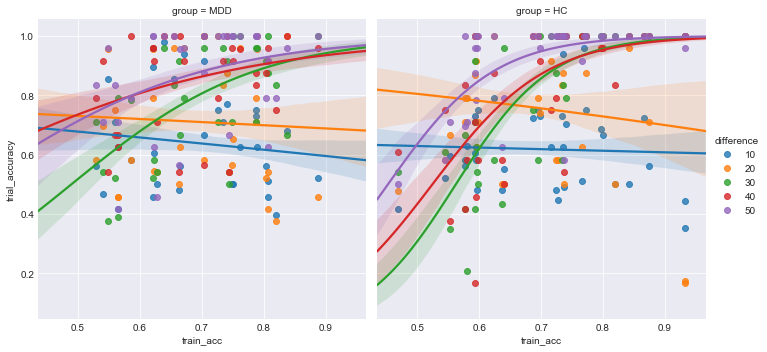

In [105]:
# Looks like the interaction is a bit steeper in controls--that for well-trained individuals, the accuracy difference
# b/w the least discrepant pairs (10/20% diff) and the other pairs is bigger in HC vs. MDD . . . 

sns.lmplot(y='trial_accuracy',x='train_acc',logistic=True,hue='difference',units='subject',ci=68,
           col='group',data=df)
plt.savefig(path2figs + 'trial_accXtrain_acc.pdf'.format(g))

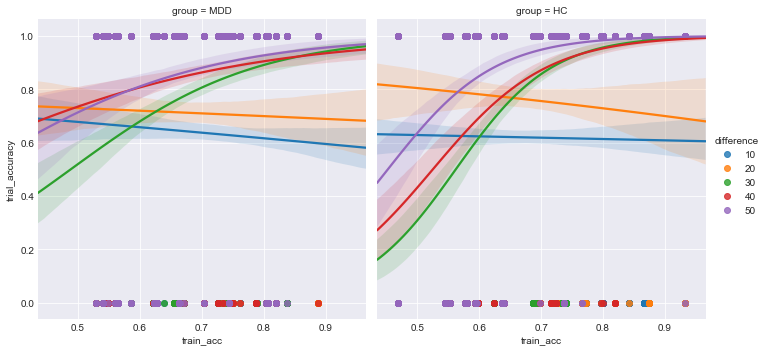

In [106]:
# Same graph but using the unaggregated data . . . .just confirming that the result is basically the same

sns.lmplot(y='trial_accuracy',x='train_acc',logistic=True,hue='difference',units='subject',ci=68,
           col='group',data=test_train)

The code below hangs with Age in there, not sure why but not worrrying about it at the moment, just leaving Age out b/c, frankly, I don't think it's going to make much difference . . . 

In [107]:
# I ran lmer on df but I don't think that's right b/c you want to work with logistic regression here (that's what 
# the graphs use), and so I think you need to use test_train as the data . . . (incidentally, I'm just thinking 
# aloud here, so "I" and "you" both refer to me:)

# I used deviance coding for group here but dummy coding for difference--this is the easiest for me to understand.
# If my thinking is correct, I believe I'm seeing a Group x Training Accuracy x Difference effect, relative to
# what's seen when Difference = 10, when Difference is 30, 40, or 50, but not when Difference = 20. Looking at
# the graphs, I think this reflects two things: (a) when the Difference is 50, it looks like HC > MDD roughly
# independent of training accuracy, but (b) when the Difference is 30 or 40, it looks like MDD > HC for lower
# training accuracy, with that group difference vanishing at higher training accuracies.

# Also notice that if you set training accuracy aside, you still get Group x Difference interactions at every level
# (it's a trend, with MDD > HC, when difference = 20)

test_train.con_trial_type = test_train.con_trial_type.astype(str)
test_train.WTAR_NatEng = test_train.WTAR_NatEng.astype(str)
test_train['group_FX'] = test_train.group.replace({'HC':-1,'MDD':1})

tt_clean = test_train[['subject','group_FX','Age','difference','train_acc','trial_accuracy']]

%Rpush tt_clean
# %R test_train$difference <- scale(test_train$difference)
%R tt_clean$difference <- as.factor(tt_clean$difference)
# %R str(tt_clean)

%R test_train.fm1 <- glmer(trial_accuracy ~ difference*train_acc + (1|subject), family=binomial,\
                           control=glmerControl(optimizer="bobyqa",\
                                                optCtrl=list(maxfun=2e5)), data=tt_clean)
%R test_train.fm2 <- glmer(trial_accuracy ~ difference*train_acc*group_FX + (1|subject), family=binomial,\
                           control=glmerControl(optimizer="bobyqa",\
                                                optCtrl=list(maxfun=2e5)), data=tt_clean)

%R test_train.aov <- anova(test_train.fm1,test_train.fm2)
%R print(test_train.aov)
%R print(summary(test_train.fm2))

/Users/ebarrick/anaconda/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Error in pwrssUpdate(pp, resp, tol = tolPwrss, GQmat = GQmat, compDev = compDev,  : 
  Interrupted

  warnings.warn(x, RRuntimeWarning)
/Users/ebarrick/anaconda/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: In addition: 
  warnings.warn(x, RRuntimeWarning)
/Users/ebarrick/anaconda/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: There were 31 warnings (use warnings() to see them)
  warnings.warn(x, RRuntimeWarning)
/Users/ebarrick/anaconda/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: 

  warnings.warn(x, RRuntimeWarning)


KeyboardInterrupt: 

In [ ]:
# I think following up the triple interaction w/o some re-coding is going to be a bear b/c training accuracy
# is continuous. I think it will be much easier if we split training accuracy into groups (50-60, 60-70, etc).

def TrainAccGroup(accuracy):
    if accuracy < 0.60:
        group = '50-59'
    elif accuracy >= 0.60 and accuracy < 0.70:
        group = '60-69'
    elif accuracy >= 0.70 and accuracy < 0.80:
        group = '70-79'
    elif accuracy >= 0.80 and accuracy < 0.90:
        group = '80-89'
    elif accuracy >= 0.90:
        group = '90+'
    
    return group

df['train_acc_group'] = df.train_acc.apply(TrainAccGroup)

In [ ]:
# This is interesting. First, notice that there are no 90+ subjects in the MDD group--only HCs achieved that level of
# training accuracy. Second, notice how poorly the 90+ group does with differences of 10/20% . . . I'm not sure why
# this is but a safe conclusion is that high training accuracy does not imply better ability to discriminate b/w small
# differences (this is true for 80-89 group too, they are second worse [behind 90+] for 10% diffs). Third, the HC
# group, ~regardless of training accuracy, does better than the MDD group when the difference is 40/50. Let's
# put this into an ANOVA.

# By the way, the easiest way to see the effect from the early graphs is to notice that for the 70,80,90 groups,
# accuracy really doesn't change much once you get to differences of 30+. By contrast, for the 50 and 60 groups,
# there is a ~linear increase in accuracy as differences go from 30 to 40 to 50.

sns.factorplot(y='trial_accuracy',x='difference',hue='train_acc_group',col='group',units='subject',ci=68,kind='bar',
               hue_order=['50-59','60-69','70-79','80-89','90+'],data=df)
plt.ylim(0.0,1.05)

In [104]:
# This is pure cherry-picking--total gofp stuff--but I tried some more principled approaches before with nothing much
# coming of it, so here I'm testing group diffs that look large and seeing what (if anything) comes of it . . . 
# . . . these two don't come out, and that makes me think that this approach is basically a dead end:(
misc.ttest_2s(df[(df.group == 'HC') & (df.train_acc_group == '80-89') & (df.difference == 50)]['trial_accuracy'],
              df[(df.group == 'MDD') & (df.train_acc_group == '80-89') & (df.difference == 50)]['trial_accuracy'])

misc.ttest_2s(df[(df.group == 'HC') & (df.train_acc_group == '80-89') & (df.difference == 30)]['trial_accuracy'],
              df[(df.group == 'MDD') & (df.train_acc_group == '80-89') & (df.difference == 30)]['trial_accuracy'])

t(8) = 2.16, p = 0.063, g = 1.394
t(8) = 1.85, p = 0.101, g = 1.197


(1.8541624027073189, 0.10083038159374806, 1.196856684474896)

In [105]:
# Because there are no MDDs in the 90+ group, we need to drop that group for the ANOVA. First let's see how many
# people have achieved the different levels of training accuracy, by group . . . even this isn't so clear, because 
# although there are 2 HCs vs 0 MDDs in the 90+ group, there are 6 MDDs vs. 4 HCs in the 80-89 group . . .

g = df.groupby(['subject','Age','group','train_acc_group'])['trial_accuracy'].mean()
g = g.to_frame()
g.reset_index(inplace=True)

h = g.groupby('group')['train_acc_group'].value_counts().to_frame('n_per_group').reset_index()
h.head(10)

,group,train_acc_group,n_per_group
0,HC,70-79,13
1,HC,50-59,12
2,HC,60-69,6
3,HC,80-89,4
4,HC,90+,2
5,MDD,70-79,12
6,MDD,60-69,9
7,MDD,50-59,7
8,MDD,80-89,6


In [106]:
# Main effects of training accuracy group and difference, plus training accuracy x difference interaction, 
# but no effects involving group . . . 

dfc = df[~(df.train_acc_group == '90+')] # dfc = 'df cleaned'
%Rpush dfc
%R str(dfc)
%R dfc$difference <- as.factor(dfc$difference)

%R dfc.acov <- aov_ez(id='subject',dv='trial_accuracy',within='difference',between=c('train_acc_group','group'),\
                   covariate='Age',factorize=FALSE,data=dfc,anova_table=list(correction='GG',es='pes'))
%R print(dfc.acov)

'data.frame':	345 obs. of  7 variables:
 $ subject        : Factor w/ 69 levels "RMD003","RMD004",..: 1 1 1 1 1 2 2 2 2 2 ...
 $ group          : Factor w/ 2 levels "HC","MDD": 2 2 2 2 2 1 1 1 1 1 ...
 $ Age            : int  43 43 43 43 43 37 37 37 37 37 ...
 $ difference     : int  10 20 30 40 50 10 20 30 40 50 ...
 $ train_acc      : num  0.82 0.82 0.82 0.82 0.82 ...
 $ trial_accuracy : num  0.396 0.375 0.833 0.75 0.792 ...
 $ train_acc_group: Factor w/ 4 levels "50-59","60-69",..: 4 4 4 4 4 3 3 3 3 3 ...


/Users/ebarrick/anaconda/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Contrasts set to contr.sum for the following variables: train_acc_group, group

  warnings.warn(x, RRuntimeWarning)


Anova Table (Type 3 tests)

Response: trial_accuracy
                            Effect           df  MSE        F   pes p.value
1                  train_acc_group        3, 60 0.07 8.44 ***   .30  <.0001
2                            group        1, 60 0.07     1.29   .02     .26
3                              Age        1, 60 0.07     0.01 .0001     .93
4            train_acc_group:group        3, 60 0.07     0.74   .04     .53
5                       difference 2.86, 171.35 0.03   2.85 *   .05     .04
6       train_acc_group:difference 8.57, 171.35 0.03 4.68 ***   .19  <.0001
7                 group:difference 2.86, 171.35 0.03     1.91   .03     .13
8                   Age:difference 2.86, 171.35 0.03     0.45  .007     .71
9 train_acc_group:group:difference 8.57, 171.35 0.03     0.80   .04     .61
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘+’ 0.1 ‘ ’ 1

Sphericity correction method: GG 


## Win-stay/lose-shift

In [107]:
def WinStayCheck(df):
    '''For each pair, check on subject's last choice and feedback. If the last feedback was a reward and the subject
    sticks with the same choice, that's a win-stay trial. If the last feedback was a reward and subject changes choice,
    that's a win-shift trial. If the last feedback was a zero and the subject choice stays/shifts, that's lose-stay/
    lose-shift. Assumes the df has a column "ID".'''
    
    dfs = []
    for sub in df.subject.unique():
        
        d = {'AB':{'last_choice':'none','last_feedback':'none'},
             'CD':{'last_choice':'none','last_feedback':'none'},
             'EF':{'last_choice':'none','last_feedback':'none'}}
        
        sdf = df[df.subject == sub]
        tt = []
        for i, row_i in sdf.iterrows():
            if d[row_i.pair]['last_choice'] == 'none':
                tt.append(np.nan)

            elif (d[row_i.pair]['last_choice'] == row_i.choice) and (d[row_i.pair]['last_feedback'] == 'reward'):
                tt.append('win-stay')
            
            elif (d[row_i.pair]['last_choice'] != row_i.choice) and (d[row_i.pair]['last_feedback'] == 'reward'):
                tt.append('win-shift')
            
            elif (d[row_i.pair]['last_choice'] == row_i.choice) and (d[row_i.pair]['last_feedback'] == 'zero'):
                tt.append('lose-stay')
            
            elif (d[row_i.pair]['last_choice'] != row_i.choice) and (d[row_i.pair]['last_feedback'] == 'zero'):
                tt.append('lose-shift')

            d[row_i.pair]['last_choice'] = row_i.choice
            d[row_i.pair]['last_feedback'] = row_i.feedback
        
        sdf['trial_type'] = tt
    
        dfs.append(sdf)
    out = pd.concat(dfs)
    out.reset_index(inplace=True,drop=True)
    
    return out

In [108]:
train = WinStayCheck(train_clean)

In [109]:
train[['subject','trial_num','pair','choice','feedback','trial_type']].head(20)

,subject,trial_num,pair,choice,feedback,trial_type
0,RMD003,1,CD,D,reward,NaN
1,RMD003,2,EF,F,zero,NaN
2,RMD003,3,AB,A,reward,NaN
3,RMD003,4,AB,B,zero,win-shift
4,RMD003,5,CD,D,zero,win-stay
5,RMD003,6,EF,F,zero,lose-stay
6,RMD003,7,EF,E,zero,lose-shift
7,RMD003,8,CD,D,zero,lose-stay
8,RMD003,9,AB,B,reward,lose-stay
9,RMD003,10,EF,F,reward,lose-shift


In [110]:
# Now how about a graph of the evolution of win-stay trials as a function of pair type and block number?
# First need to do some legwork . . . 


df = train.groupby(['subject','Age','group','block','pair'])['trial_type'].value_counts().to_frame('count').reset_index()
df.head()

# Now compute percentages
d = {}
for sub in df.subject.unique():
    for curr_block in range(1,5):
        for curr_pair in ['AB','CD','EF']:
            count_sum = df[(df.subject == sub) & (df.block == curr_block) & (df.pair == curr_pair)]['count'].sum()
            d[(sub,curr_block,curr_pair)] = count_sum #

# I'm sure there is a better way, but this works . . . 
pcts = []
for i, row_i in df.iterrows():
    count_sum = d[(row_i.subject,row_i.block,row_i.pair)]
    pct = float(row_i['count'])/count_sum
    pcts.append(pct)
df['pct'] = pcts

In [111]:
df.head()

,subject,Age,group,block,pair,trial_type,count,pct
0,RMD003,43,MDD,1,AB,win-stay,8,0.421053
1,RMD003,43,MDD,1,AB,lose-stay,7,0.368421
2,RMD003,43,MDD,1,AB,lose-shift,2,0.105263
3,RMD003,43,MDD,1,AB,win-shift,2,0.105263
4,RMD003,43,MDD,1,CD,win-stay,6,0.315789


In [112]:
df.tail()

,subject,Age,group,block,pair,trial_type,count,pct
3564,RMD106,19,HC,4,CD,win-shift,3,0.15
3565,RMD106,19,HC,4,EF,lose-shift,7,0.35
3566,RMD106,19,HC,4,EF,lose-stay,5,0.25
3567,RMD106,19,HC,4,EF,win-stay,5,0.25
3568,RMD106,19,HC,4,EF,win-shift,3,0.15


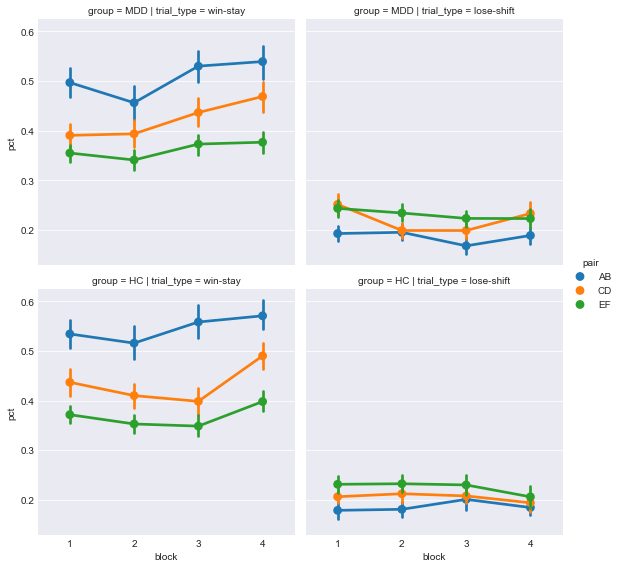

In [113]:
sns.factorplot(y='pct',x='block',hue='pair',col='trial_type',row='group',units='subject',ci=68,
               data=df[((df.trial_type == 'win-stay') | (df.trial_type == 'lose-shift'))])

In [114]:
# Effects of Block, Trial_Type, Block x Pair, with a trend for Pair x Trial_Type. Some Age stuff in there too but
# no effects involving Group . . . 

ws = df[(df.trial_type == 'win-stay') | (df.trial_type == 'lose-shift')]

%Rpush ws
%R ws$block <- as.factor(ws$block)
# %R str(ws)

%R ws.acov <- aov_ez(id='subject',dv='pct',within=c('block','pair','trial_type'),between='group',data=ws,\
                   covariate='Age',factorize=FALSE,anova_table=list(correction='GG',es='pes'))
%R print(ws.acov)

Anova Table (Type 3 tests)

Response: pct
                        Effect           df  MSE       F  pes p.value
1                        group        1, 35 0.02    0.32 .009     .57
2                          Age        1, 35 0.02    0.18 .005     .67
3                        block  2.77, 96.86 0.01 4.16 **  .11    .010
4                  group:block  2.77, 96.86 0.01    1.68  .05     .18
5                    Age:block  2.77, 96.86 0.01  3.17 *  .08     .03
6                         pair  2.00, 69.92 0.01    0.43  .01     .65
7                   group:pair  2.00, 69.92 0.01    0.72  .02     .49
8                     Age:pair  2.00, 69.92 0.01    2.17  .06     .12
9                   trial_type        1, 35 0.09 9.01 **  .20    .005
10            group:trial_type        1, 35 0.09    2.40  .06     .13
11              Age:trial_type        1, 35 0.09    0.92  .03     .34
12                  block:pair 4.59, 160.56 0.01 3.46 **  .09    .007
13            group:block:pair 4.59, 160.56 0.01

In [115]:
# Follow-up Pair x TT: more lose-shifts on EF vs. AB, more win-stays on AB vs. CD and/or EF, trend for CD > EF
%R ws.lsm <- lsmeans(ws.acov, ~ pair*trial_type)
%R print(ws.lsm)
%R print(pairs(ws.lsm))

 pair trial_type    lsmean         SE    df  lower.CL  upper.CL
 AB   lose.shift 0.2338574 0.02015702 83.08 0.1937664 0.2739484
 CD   lose.shift 0.2556748 0.02022234 84.09 0.2154611 0.2958885
 EF   lose.shift 0.2691831 0.02016968 83.26 0.2290683 0.3092979
 AB   win.stay   0.4663536 0.02015702 83.08 0.4262627 0.5064446
 CD   win.stay   0.3695340 0.02022234 84.09 0.3293203 0.4097477
 EF   win.stay   0.3441204 0.02016968 83.26 0.3040056 0.3842353

Results are averaged over the levels of: group, block 
Confidence level used: 0.95 


 contrast                         estimate         SE     df t.ratio p.value
 AB,lose.shift - CD,lose.shift -0.02181743 0.01314647 201.21  -1.660  0.5601
 AB,lose.shift - EF,lose.shift -0.03532572 0.01290146 198.40  -2.738  0.0724
 AB,lose.shift - AB,win.stay   -0.23249622 0.02375512  71.40  -9.787  <.0001
 AB,lose.shift - CD,win.stay   -0.13567660 0.02196819  54.54  -6.176  <.0001
 AB,lose.shift - EF,win.stay   -0.11026305 0.02191823  54.06  -5.031  0.0001
 CD,lose.shift - EF,lose.shift -0.01350829 0.01320456 197.70  -1.023  0.9098
 CD,lose.shift - AB,win.stay   -0.21067879 0.02196819  54.54  -9.590  <.0001
 CD,lose.shift - CD,win.stay   -0.11385917 0.02393467  73.21  -4.757  0.0001
 CD,lose.shift - EF,win.stay   -0.08844562 0.02190339  53.92  -4.038  0.0023
 EF,lose.shift - AB,win.stay   -0.19717050 0.02191823  54.06  -8.996  <.0001
 EF,lose.shift - CD,win.stay   -0.10035088 0.02190339  53.92  -4.582  0.0004
 EF,lose.shift - EF,win.stay   -0.07493733 0.02384699  72.32  -3.142  0.0282

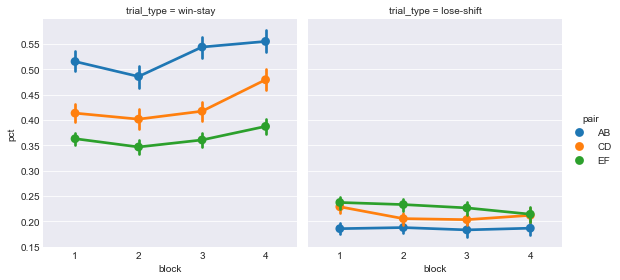

In [116]:
sns.factorplot(y='pct',x='block',hue='pair',col='trial_type',units='subject',ci=68,
               data=df[((df.trial_type == 'win-stay') | (df.trial_type == 'lose-shift'))])

## Modeling Training

In [117]:
 # Re-code the data to make modeling easier . . . 

train['state'] = train.pair
train.state = train.state.replace({'AB':1,'CD':2,'EF':3})
train['action'] = train.choice
train.action = train.action.replace({'A':1,'C':2,'E':3,'F':4,'D':5,'B':6})
train['reward'] = train.feedback
train.reward = train.reward.replace({'zero':0,'reward':1})

In [118]:
def RL_eq(Q_old,fdbk,alpha_loss,alpha_gain):
    '''Given old Q value and feedback, compute new Q value, using different alphas for gains vs. losses.'''
    
    Q_new = np.nan
    PE = np.nan
    
    if fdbk == 1:
        PE = fdbk - Q_old
        Q_new = Q_old + (alpha_gain * PE)
    
    elif fdbk == 0:
        PE = fdbk - Q_old
        Q_new = Q_old + (alpha_loss * PE)
    
    return (Q_new,PE)   

In [119]:
def SoftMax(Q_Chosen,Q_NotChosen,beta):
    '''Given Q values for actions chosen and not chosen, compute the probability of the chosen action via the
    softmax function.'''
    
    
    numerator = np.power(np.e,(Q_Chosen/beta))
    denomenator = numerator + (np.power(np.e,(Q_NotChosen/beta)))
    
    prob_chosen = numerator/denomenator
    
    return prob_chosen

In [120]:
def RL_likelihood(params,df):
    '''Given alpha_gain, alpha_loss, beta, and the df (rows of state, action, reward), return -logp.'''

    ag,al,b = params
    
    Q = {1:{1:0.5,6:0.5},2:{2:0.5,5:0.5},3:{3:0.5,4:0.5}} # All Q-values initialized to 0.5 (not good, not bad)

    logp = 0
    for i, row_i in df.iterrows():
        Qs = Q[row_i.state] # Get the Q values for this state
        Q_Chosen = Qs[row_i.action] # Give me the Q value for the chosen stimulus
        for k in Qs.keys(): # Look through the stimuli . . . 
            if k != row_i.action: # . . . if you see a stimulus that's not the chosen stimulus . . . 
                Q_NotChosen = Qs[k] # . .. then that must be the not-chosen stimulus, so give me its Q-value.

        prob_chosen = SoftMax(Q_Chosen,Q_NotChosen,b)
        logp = logp + np.log(prob_chosen)
        Q_new, PE = RL_eq(Q_old=Q[row_i.state][row_i.action],fdbk=row_i.reward,
                                             alpha_loss=al,alpha_gain=ag)
        Q[row_i.state][row_i.action] = Q_new

    # Use negative log likelihood because the optimizer will search for the minimum (thus = max LL).
    return -logp 

In [121]:
# Find the optimum alpha_gain, alpha_loss, and beta values for each subject

def OptFit(df):
    '''Given a df that consists of state, action, reward cols, use fmin to search for the best-fitting alpha_gain, 
    alpha_loss, and beta.'''
    
    opt_final = (0,99999999) # You're going to replace this w/opt_new, where you'll need to call item 1, so start now.
    
    # Optimize the model fit. For each subject, try three different sets of starting params to avoid converge fails.
    for params in [(0.1,0.1,1),(0.5,0.5,10),(0.9,0.9,19)]:
        
        opt_new = sp.optimize.fmin(RL_likelihood, [params[0], params[1], params[2]], args=(df,), full_output=True)
    
        if opt_new[1] < opt_final[1]:
            opt_final = opt_new
    
    best_ag = opt_new[0][0]
    best_al = opt_new[0][1]
    best_b = opt_new[0][2]
    min_val = opt_new[1]
    
    if best_ag < 0:
        best_ag = 0
    elif best_ag > 1:
        best_ag = 1
    
    if best_al < 0:
        best_al = 0
    elif best_al > 1:
        best_al = 1
           
    if best_b < 0:
        best_b = 0  
    elif best_b > 20:
        best_b = 20
    
    # Now that we have the best values, let's add them to the df.
    df['alpha_gain'] = best_ag
    df['alpha_loss'] = best_al
    df['beta'] = best_b
    
    # Now go through the df, with the best fitting alphas, and generate PE and Q on each trial.
    PEs = []
    Qs = []
    
    Q = {1:{1:0.5,6:0.5},2:{2:0.5,5:0.5},3:{3:0.5,4:0.5}} # Q-values initialized to 0.5 (not good, not bad)

    for i, row_i in df.iterrows():
        Q_new, PE = RL_eq(Q_old=Q[row_i.state][row_i.action],fdbk=row_i.reward,
                                             alpha_loss=best_al,alpha_gain=best_ag)
        Q[row_i.state][row_i.action] = Q_new
        Qs.append(Q_new)
        PEs.append(PE)
    df['Q'] = Qs
    df['PE'] = PEs
            
    return df

In [123]:
# out = []
# for sub in train.subject.unique():
#      df = OptFit(train[train.subject == sub])
#      out.append(df)

# model_train = pd.concat(out)
# model_train.to_csv(path2analysis + 'model_train.csv', index=False)

In [124]:
model_train = pd.read_csv(path2analysis + 'model_train.csv')

In [125]:
model_train.head()

,index,subject,group,trial_num,block,trial_RT,lnRT,accuracy,left_stim,left_stim_number,...,choice,trial_type,state,action,reward,alpha_gain,alpha_loss,beta,Q,PE
0,0,RMD003,MDD,1,1,1.467,0.383219,0,Stimuli/1.bmp,2,...,D,NaN,2,5,1,1.0,0.342704,0.347334,1.000000,0.5
1,1,RMD003,MDD,2,1,1.134,0.125751,0,Stimuli/4.bmp,3,...,F,NaN,3,4,0,1.0,0.342704,0.347334,0.328648,-0.5
2,2,RMD003,MDD,3,1,0.917,-0.086648,1,Stimuli/6.bmp,1,...,A,NaN,1,1,1,1.0,0.342704,0.347334,1.000000,0.5
3,3,RMD003,MDD,4,1,1.200,0.182322,0,Stimuli/6.bmp,1,...,B,win-shift,1,6,0,1.0,0.342704,0.347334,0.328648,-0.5
4,4,RMD003,MDD,5,1,1.500,0.405465,0,Stimuli/5.bmp,5,...,D,win-stay,2,5,0,1.0,0.342704,0.347334,0.657296,-1.0


In [126]:
model_train.alpha_gain.describe()

count    18809.000000
mean         0.469895
std          0.353433
min          0.006521
25%          0.154364
50%          0.379739
75%          0.840720
max          1.000000
Name: alpha_gain, dtype: float64

In [127]:
model_train.alpha_loss.describe()

count    18809.000000
mean         0.269065
std          0.311975
min          0.000000
25%          0.028660
50%          0.106184
75%          0.454881
max          1.000000
Name: alpha_loss, dtype: float64

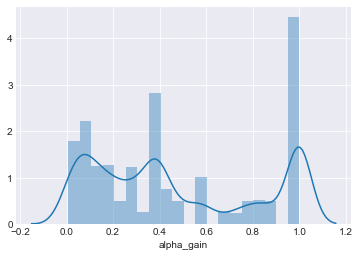

In [128]:
sns.distplot(model_train.alpha_gain)

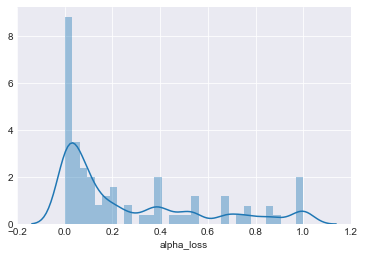

In [129]:
sns.distplot(model_train.alpha_loss)

In [130]:
model_train.subject.nunique()

80

In [131]:
model_train.beta.describe()

count    18809.000000
mean         1.112268
std          3.238433
min          0.023657
25%          0.183614
50%          0.303966
75%          0.550147
max         20.000000
Name: beta, dtype: float64

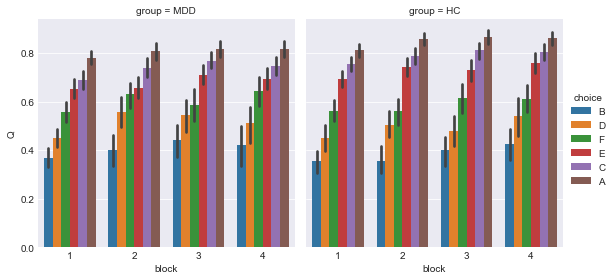

In [132]:
# Looks like Q for A may be a bit higher in HC . . . 
sns.factorplot(y='Q',x='block',hue='choice',hue_order=['B','D','F','E','C','A'],col='group',units='subject',
               kind='bar',ci=68,data=model_train)

In [133]:
# Group x Block x Choice ANCOVA on Q values . . . main effect of Choice, Group effects not close
model_trim = model_train[['subject','Age','group','block','choice','Q','alpha_gain','alpha_loss']]
%Rpush model_trim
%R model_trim$block <- as.factor(model_trim$block)
# %R str(model_trim)

%R Q.acov <- aov_ez(id='subject',dv='Q',within=c('block','choice'),between='group',data=model_trim,\
                   covariate='Age',factorize=FALSE,anova_table=list(correction='GG',es='pes'))
%R print(Q.acov)

Anova Table (Type 3 tests)

Response: Q
               Effect           df  MSE         F   pes p.value
1               group        1, 43 1.20      0.02 .0004     .89
2                 Age        1, 43 1.20    2.85 +   .06     .10
3               block  2.03, 87.34 0.03      0.98   .02     .38
4         group:block  2.03, 87.34 0.03      0.10  .002     .91
5           Age:block  2.03, 87.34 0.03      0.16  .004     .86
6              choice  2.06, 88.55 0.07 12.51 ***   .23  <.0001
7        group:choice  2.06, 88.55 0.07      0.26  .006     .78
8          Age:choice  2.06, 88.55 0.07      0.50   .01     .62
9        block:choice 6.51, 279.79 0.02      0.53   .01     .80
10 group:block:choice 6.51, 279.79 0.02      0.68   .02     .68
11   Age:block:choice 6.51, 279.79 0.02      0.71   .02     .66
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘+’ 0.1 ‘ ’ 1

Sphericity correction method: GG 


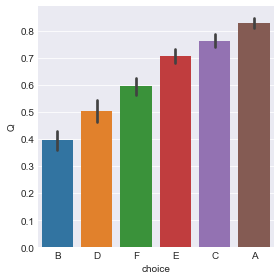

In [134]:
# Plotting Choice effect on Q values
sns.factorplot(y='Q',x='choice',order=['B','D','F','E','C','A'],units='subject',kind='bar',ci=68,data=model_trim)

In [135]:
# Figured I'd take a look at group difference in Q for choice A, as visually it looked best . . . not close to sig.
df = misc.MakeFrame(in_df=model_trim,id_vars=['group','subject','choice'],dv='Q')

misc.ttest_2s(df[(df.group == 'HC') & (df.choice == 'A')]['Q'],
              df[(df.group == 'MDD') & (df.choice == 'A')]['Q'])

t(78) = 1.02, p = 0.310, g = 0.229


(1.0228338291956607, 0.3095482742751719, 0.22871259717679063)

In [136]:
# Any difference in alpha gain or loss? Nope . . . 

df = misc.MakeFrame(in_df=model_trim,id_vars=['group','subject'],dv=['alpha_gain','alpha_loss'])
df.head()

misc.ttest_2s(df[df.group == 'HC']['alpha_gain'],df[df.group == 'MDD']['alpha_gain'])
misc.ttest_2s(df[df.group == 'HC']['alpha_loss'],df[df.group == 'MDD']['alpha_loss'])

t(78) = 0.76, p = 0.449, g = 0.170
t(78) = 0.01, p = 0.993, g = 0.002


(0.0086442801459728717, 0.99312501926873131, 0.0019329198022947146)

In [137]:
def RunningTrials(data):
    '''Given block and trial numbers, return a continuous trial count.'''
    block, trial_num = data
    if block == 1:
        out = trial_num
    elif block == 2:
        out = trial_num + 60
    elif block == 3:
        out = trial_num + 120
    elif block == 4:
        out = trial_num + 180
    
    return out
model_train['trial_continuous'] = model_train[['block','trial_num']].apply(RunningTrials,axis=1)

/Users/ebarrick/anaconda/lib/python2.7/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)
/Users/ebarrick/anaconda/lib/python2.7/site-packages/seaborn/algorithms.py:76: RuntimeWarning: Mean of empty slice
  boot_dist.append(func(*sample, **func_kwargs))


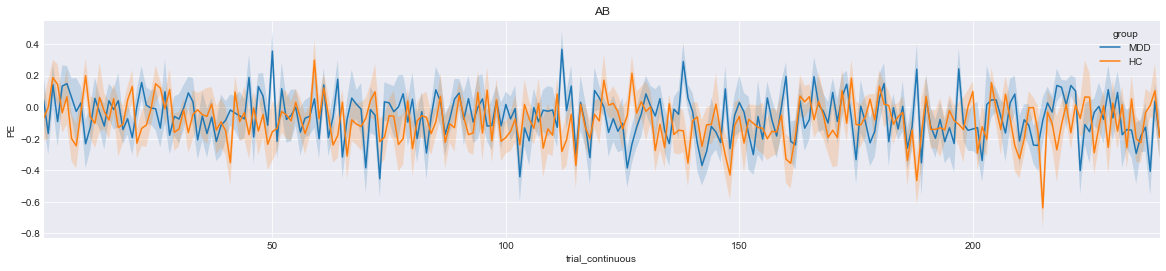

In [138]:
sns.set_style('darkgrid')
plt.subplots(figsize=(20, 4))
ax1= sns.tsplot(model_train[model_train.pair == 'AB'],value='PE',unit='subject',condition = 'group',
                time='trial_continuous', estimator=np.nanmean)
ax1.set_title('AB')

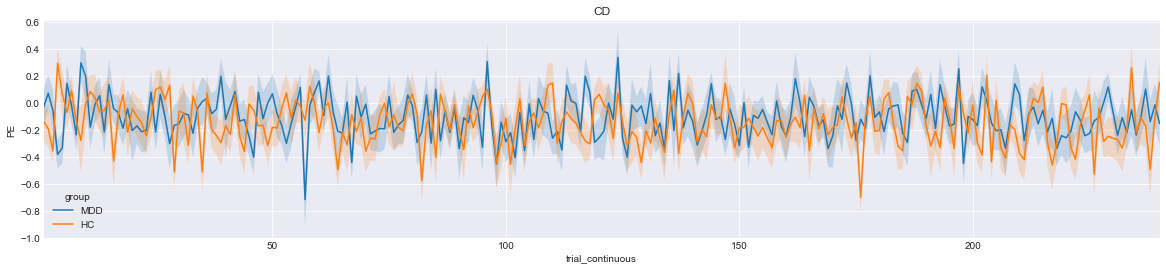

In [139]:
plt.subplots(figsize=(20, 4))
ax2 = sns.tsplot(model_train[model_train.pair == 'CD'],value='PE',unit='subject',condition = 'group',
                 time='trial_continuous',estimator=np.nanmean)
ax2.set_title('CD')

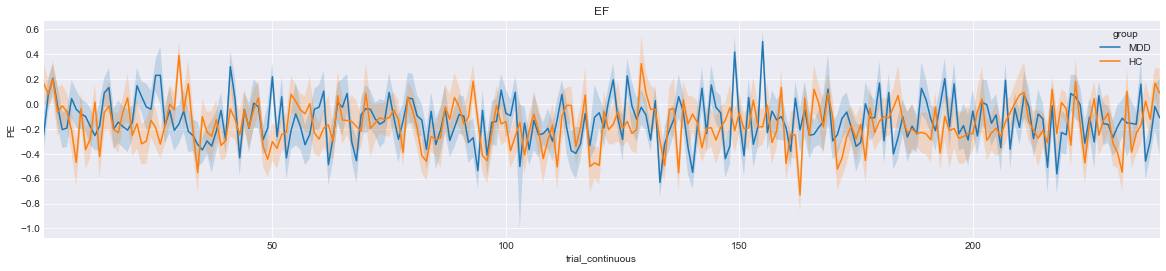

In [140]:
plt.subplots(figsize=(20, 4))
ax3 = sns.tsplot(model_train[model_train.pair == 'EF'],value='PE',unit='subject',condition = 'group',
                 time='trial_continuous',estimator=np.nanmean)
ax3.set_title('EF')

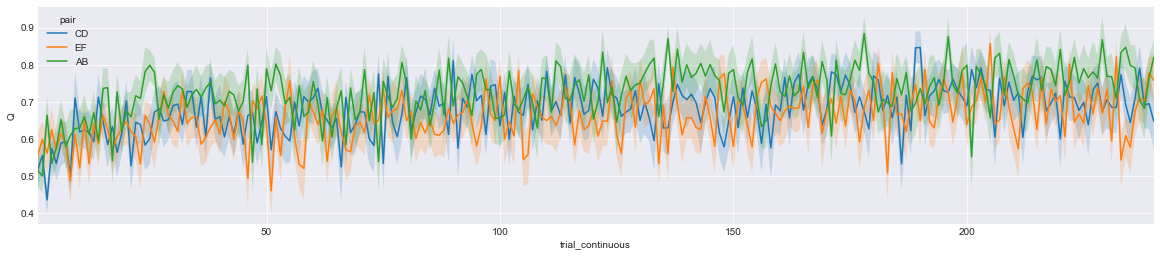

In [141]:
sns.set_style('darkgrid')
plt.subplots(figsize=(20, 4))
sns.tsplot(model_train,value='Q',unit='subject',time='trial_continuous',condition='pair',estimator=np.nanmean)

In [142]:
model_HC = model_train[model_train.group == 'HC']

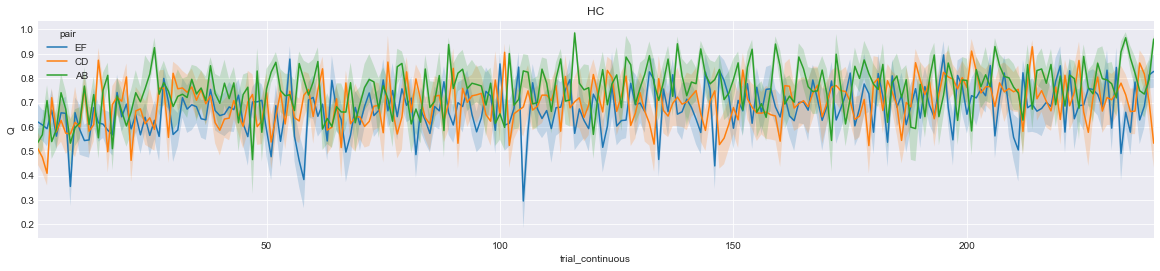

In [143]:
sns.set_style('darkgrid')
plt.subplots(figsize=(20, 4))
ax4 = sns.tsplot(model_HC,value='Q',unit='subject',time='trial_continuous',condition='pair',estimator=np.nanmean)
ax4.set_title('HC')

In [144]:
model_MDD = model_train[model_train.group == 'MDD']

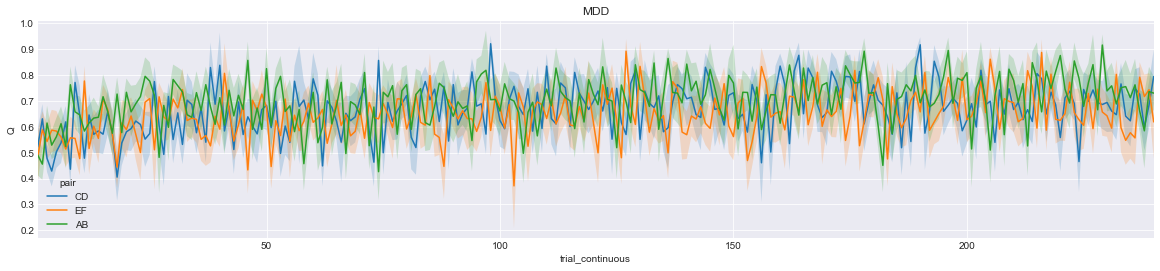

In [145]:
sns.set_style('darkgrid')
plt.subplots(figsize=(20, 4))
ax5 = sns.tsplot(model_MDD,value='Q',unit='subject',time='trial_continuous',condition='pair',estimator=np.nanmean)
ax5.set_title('MDD')